# House Price Prediction Using Regularization for Surprise Housing

## Importing and Reading data

In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [205]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

In [3]:
# Importing dataset into 'train_df' python dataframe
train_df = pd.read_csv('Datasets/train.csv')
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
# Let us see the shape of the data
train_df.shape

(1460, 81)

In [5]:
# Let us check for the null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We have 19 fields with Null values, let us print the field names.

In [6]:
train_df.columns[train_df.isna().any()].to_list()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

### Fixing Null values in the Numerical fields 
#### Updating Null values in the numerical field 'Alley'

Let us check the values in the field "Alley"

In [7]:
train_df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

Based on Data Description, Let us fill value 'No alley access' in the field "Alley".

In [8]:
train_df.Alley = train_df.Alley.fillna('No alley access')
train_df.Alley

0       No alley access
1       No alley access
2       No alley access
3       No alley access
4       No alley access
             ...       
1455    No alley access
1456    No alley access
1457    No alley access
1458    No alley access
1459    No alley access
Name: Alley, Length: 1460, dtype: object

Let us check the value count now.

In [9]:
train_df.Alley.value_counts()

No alley access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [10]:
# Checking a data item with max occurence in the column
train_df.Alley.value_counts().max()

1369

In [11]:
# Total number of records
len(train_df.Alley)

1460

In [12]:
1369/1460*100

93.76712328767123

Thus we have overall 94% occurence of a single value 'No alley access" in this column. Thus we can remove this column as this is not usefull column for our analysis.

In [13]:
Cols_to_remove = ['Alley']
Cols_to_remove

['Alley']

#### Updating Null values in the numerical field 'BsmtQual' and 'BsmtCond'

In [14]:
# let us check for the values in the "BsmtQual" field
train_df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [15]:
# let us check for the values in the "BsmtCond" field
train_df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

Let us fill value 'NA' in the fields "BsmtQual" and "BsmtCond" to keep the consistency in the values.

In [16]:
# Based on Data Description, Let us fill value 'NA' in the field "BsmtQual"
train_df.BsmtQual = train_df.BsmtQual.fillna('NA')
train_df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [17]:
# Based on Data Description, Let us fill value 'NA' in the field "BsmtCond"
train_df.BsmtCond = train_df.BsmtCond.fillna('NA')
train_df.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64

In [18]:
# Let us check for the % of the data items occured max times in both the fields
print(train_df.BsmtQual.value_counts().max()/1460*100)
print(train_df.BsmtCond.value_counts().max()/1460*100)

44.45205479452055
89.7945205479452


If we consider a threshold of 80%, field 'BsmtCond' can be removed.

In [19]:
Cols_to_remove.append('BsmtCond')
Cols_to_remove

['Alley', 'BsmtCond']

#### Updating Null values in the numerical field 'BsmtExposure'

In [20]:
# let us check for the values in the "BsmtExposure" field
train_df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [21]:
# Based on Data Description, Let us fill value 'NA' in the field "BsmtExposure" for 'No Basement' 
train_df.BsmtExposure = train_df.BsmtExposure.fillna('NA')
train_df.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64

In [22]:
# Let us check for the % of the data items occured max times in this fields
print(train_df.BsmtExposure.value_counts().max()/1460*100)

65.27397260273973


This is below 80%, hence, we will not remove this field. <br/>
Let us cross-check all the columns after checking the Null values.

#### Updating Null values in the numerical field 'BsmtFinType1'

In [23]:
# let us check for the values in the "BsmtFinType1" field
train_df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [24]:
# Based on Data Description, Let us fill value 'NA' in the field "BsmtFinType1" for 'No Basement' 
train_df.BsmtFinType1 = train_df.BsmtFinType1.fillna('NA')
train_df.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64

#### Updating Null values in the numerical field 'BsmtFinType2'

In [25]:
# let us check for the values in the "BsmtFinType2" field
train_df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [26]:
# Based on Data Description, Let us fill value 'NA' in the field "BsmtFinType2" for 'No Basement' 
train_df.BsmtFinType2 = train_df.BsmtFinType2.fillna('NA')
train_df.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

#### Updating Null values in the numerical field 'FireplaceQu'

In [27]:
# let us check for the values in the "FireplaceQu" field
train_df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [28]:
# Based on Data Description, Let us fill value 'NA' in the field "FireplaceQu" for 'No Fireplace' 
train_df.FireplaceQu = train_df.FireplaceQu.fillna('NA')
train_df.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

#### Updating Null values in the numerical field 'GarageType'

In [29]:
# let us check for the values in the "GarageType" field
train_df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [30]:
# Based on Data Description, Let us fill value 'NA' in the field "GarageType" for 'No Garage' 
train_df.GarageType = train_df.GarageType.fillna('NA')
train_df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
NA          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

#### Updating Null values in the numerical field 'GarageFinish'

In [31]:
# let us check for the values in the "GarageFinish" field
train_df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [32]:
# Based on Data Description, Let us fill value 'NA' in the field "GarageFinish" as there is no Garage.
train_df.GarageFinish = train_df.GarageFinish.fillna('NA')
train_df.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
NA      81
Name: GarageFinish, dtype: int64

#### Updating Null values in the numerical field 'GarageQual'

In [33]:
# let us check for the values in the "GarageQual" field
train_df.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [34]:
# Based on Data Description, Let us fill value 'NA' in the field "GarageQual" as there is no Garage.
train_df.GarageQual = train_df.GarageQual.fillna('NA')
train_df.GarageQual.value_counts()

TA    1311
NA      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

#### Updating Null values in the numerical field 'GarageCond'

In [35]:
# let us check for the values in the "GarageCond" field
train_df.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [36]:
# Based on Data Description, Let us fill value 'NA' in the field "GarageCond" as there is no Garage.
train_df.GarageCond = train_df.GarageCond.fillna('NA')
train_df.GarageCond.value_counts()

TA    1326
NA      81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

#### Updating Null values in the numerical field 'PoolQC'

In [37]:
# let us check for the values in the "PoolQC" field
train_df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [38]:
# Based on Data Description, Let us fill value 'NA' in the field "PoolQC" for 'No Pool'
train_df.PoolQC = train_df.PoolQC.fillna('NA')
train_df.PoolQC.value_counts()

NA    1453
Gd       3
Ex       2
Fa       2
Name: PoolQC, dtype: int64

#### Updating Null values in the numerical field 'Fence'

In [39]:
# let us check for the values in the "Fence" field
train_df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [40]:
# Based on Data Description, Let us fill value 'NA' in the field "Fence" for 'No Fence'
train_df.Fence = train_df.Fence.fillna('NA')
train_df.Fence.value_counts()

NA       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

#### Updating Null values in the numerical field 'MiscFeature'

In [41]:
# let us check for the values in the "MiscFeature" field
train_df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [42]:
# Based on Data Description, Let us fill value 'NA' in the field "MiscFeature" for 'None'
train_df.MiscFeature = train_df.MiscFeature.fillna('NA')
train_df.MiscFeature.value_counts()

NA      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

#### Updating Null values in the numerical field 'MasVnrType'

In [43]:
# let us check for the values in the "MasVnrType" field
train_df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [44]:
# Since there are only 8 Null values, let us update the Null values with NA.
train_df.MasVnrType = train_df.MasVnrType.fillna('NA')
train_df.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
NA           8
Name: MasVnrType, dtype: int64

#### Updating Null values in the numerical field 'Electrical'

In [45]:
# let us check for the values in the "Electrical" field
train_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [46]:
# Since there is only 1 Null values, let us update the Null value with None.
train_df.Electrical = train_df.Electrical.fillna('NA')
train_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NA          1
Name: Electrical, dtype: int64

### Fixing Null values in the Numerical fields 
#### Updating Null values in the numerical field 'LotFrontage'

In [47]:
# Let us check for the minimum value in the field 'LotFrontage'
min(train_df.LotFrontage)

21.0

This means there is no 0 value in the field 'LotFrontage'. <br/>
Let us update the median value of field 'LotFrontage' for Null values.

In [48]:
LotFrontage_med = train_df.LotFrontage[train_df.LotFrontage!=0].median()
LotFrontage_med

69.0

In [49]:
# Let us check for the average of LotFrontage field.
train_df.LotFrontage[train_df.LotFrontage!=0].mean()

70.04995836802665

In [50]:
# Both median value and the average value of the field 'LotFrontage' is almost close, 
# hence, let us update above median value in the field 'LotFrontage'
train_df.LotFrontage = train_df.LotFrontage.fillna(LotFrontage_med)

#### Updating Null values in the numerical field 'MasVnrArea'

In [51]:
# Let us check for the values in the "MasVnrArea" field and if it contains value 0
train_df.MasVnrArea.sort_values().value_counts()

0.0       861
180.0       8
108.0       8
72.0        8
16.0        7
         ... 
254.0       1
255.0       1
258.0       1
259.0       1
1600.0      1
Name: MasVnrArea, Length: 327, dtype: int64

Thus, there are 861 records with 0 vaulue. <br/>
Let us check for the non-zero values.

In [52]:
train_df.MasVnrArea[train_df.MasVnrArea!=0].sort_values().value_counts()

180.0     8
72.0      8
108.0     8
120.0     7
16.0      7
         ..
297.0     1
81.0      1
299.0     1
67.0      1
1600.0    1
Name: MasVnrArea, Length: 326, dtype: int64

In [53]:
# Let us check for the median of non-zero MasVnrArea values.
MasVnrArea_med = train_df.MasVnrArea[train_df.MasVnrArea!=0].median()
MasVnrArea_med

203.0

In [54]:
# Let us update above median value in the field 'MasVnrArea'
train_df.MasVnrArea = train_df.MasVnrArea.fillna(MasVnrArea_med)

#### Updating 'GarageYrBlt' field with value 0

In [55]:
train_df.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [56]:
train_df.GarageYrBlt = train_df.GarageYrBlt.fillna(0)

In [57]:
train_df.GarageYrBlt.value_counts()

0.0       81
2005.0    65
2006.0    59
2004.0    53
2003.0    50
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 98, dtype: int64

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Above result also shows that there is no Null values as the non-null count of all the fields and the total number entries are same. <br />
However, let us confirm with isnull() function.

In [59]:
# Check Null values
train_df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [60]:
train_df.columns[train_df.isna().any()].to_list()

[]

In [61]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
train_df['MSZoning'].dtype == 'object'

True

### As mentioned earlier, let us check for the fields with a data item appearing more than 80% in the respective column.

In [63]:
Cols_to_remove = []
for i in range(0,train_df.shape[1]):
    if train_df[train_df.columns[i]].dtype == 'object':
        if train_df[train_df.columns[i]].value_counts().max()/1460*100 > 80:
            print(i+1,
                  train_df[train_df.columns[i]].dtype, 
                  train_df.columns[i], 
                  train_df[train_df.columns[i]].value_counts().max()/1460*100, 
                  train_df[train_df.columns[i]].nunique(), sep=" | ") 
            Cols_to_remove.append(train_df.columns[i])
        # print(train_df.BsmtCond.value_counts().max()/1460*100)
print(Cols_to_remove)   

6 | object | Street | 99.58904109589041 | 2
7 | object | Alley | 93.76712328767123 | 3
9 | object | LandContour | 89.7945205479452 | 4
10 | object | Utilities | 99.93150684931507 | 2
12 | object | LandSlope | 94.65753424657535 | 3
14 | object | Condition1 | 86.3013698630137 | 9
15 | object | Condition2 | 98.97260273972603 | 8
16 | object | BldgType | 83.56164383561644 | 5
23 | object | RoofMatl | 98.21917808219179 | 8
29 | object | ExterCond | 87.8082191780822 | 5
32 | object | BsmtCond | 89.7945205479452 | 5
36 | object | BsmtFinType2 | 86.02739726027397 | 7
40 | object | Heating | 97.80821917808218 | 6
42 | object | CentralAir | 93.4931506849315 | 2
43 | object | Electrical | 91.36986301369862 | 6
56 | object | Functional | 93.15068493150685 | 7
64 | object | GarageQual | 89.7945205479452 | 6
65 | object | GarageCond | 90.82191780821918 | 6
66 | object | PavedDrive | 91.78082191780823 | 3
73 | object | PoolQC | 99.52054794520548 | 4
74 | object | Fence | 80.75342465753424 | 5
75 | ob

In [64]:
# Let us drop these columns
train_df2 = train_df.drop(Cols_to_remove, axis=1)
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrType     1460 non-null   object 
 17  MasVnrArea     1460 non-null   float64
 18  ExterQua

### Same way, let us check for the numerical fields with a data item appearing more than 80% in the respective column.

In [65]:
Cols_to_remove = []
for i in range(0,train_df2.shape[1]):
    if train_df2[train_df2.columns[i]].dtype != 'object':
        if train_df2[train_df2.columns[i]].value_counts().max()/1460*100 > 80:
            print(i+1,
                  train_df2[train_df2.columns[i]].dtype, 
                  train_df2.columns[i], 
                  train_df2[train_df2.columns[i]].value_counts().max()/1460*100, 
                  train_df2[train_df2.columns[i]].nunique(), sep=" | ") 
            Cols_to_remove.append(train_df2.columns[i])
        # print(train_df.BsmtCond.value_counts().max()/1460*100)
print(Cols_to_remove) 

25 | int64 | BsmtFinSF2 | 88.56164383561645 | 144
31 | int64 | LowQualFinSF | 98.21917808219179 | 24
34 | int64 | BsmtHalfBath | 94.3835616438356 | 3
38 | int64 | KitchenAbvGr | 95.34246575342465 | 4
50 | int64 | EnclosedPorch | 85.75342465753425 | 120
51 | int64 | 3SsnPorch | 98.35616438356163 | 20
52 | int64 | ScreenPorch | 92.05479452054794 | 76
53 | int64 | PoolArea | 99.52054794520548 | 8
54 | int64 | MiscVal | 96.43835616438356 | 21
['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']


In [66]:
# Let us drop these columns
train_df2 = train_df2.drop(Cols_to_remove, axis=1)
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1460 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   LotShape      1460 non-null   object 
 6   LotConfig     1460 non-null   object 
 7   Neighborhood  1460 non-null   object 
 8   HouseStyle    1460 non-null   object 
 9   OverallQual   1460 non-null   int64  
 10  OverallCond   1460 non-null   int64  
 11  YearBuilt     1460 non-null   int64  
 12  YearRemodAdd  1460 non-null   int64  
 13  RoofStyle     1460 non-null   object 
 14  Exterior1st   1460 non-null   object 
 15  Exterior2nd   1460 non-null   object 
 16  MasVnrType    1460 non-null   object 
 17  MasVnrArea    1460 non-null   float64
 18  ExterQual     1460 non-null 

In [67]:
for i in range(0,train_df2.shape[1]):
        print(i+1, train_df2.columns[i], train_df2[train_df2.columns[i]].nunique(), sep=" | ") 

1 | Id | 1460
2 | MSSubClass | 15
3 | MSZoning | 5
4 | LotFrontage | 110
5 | LotArea | 1073
6 | LotShape | 4
7 | LotConfig | 5
8 | Neighborhood | 25
9 | HouseStyle | 8
10 | OverallQual | 10
11 | OverallCond | 9
12 | YearBuilt | 112
13 | YearRemodAdd | 61
14 | RoofStyle | 6
15 | Exterior1st | 15
16 | Exterior2nd | 16
17 | MasVnrType | 5
18 | MasVnrArea | 327
19 | ExterQual | 4
20 | Foundation | 6
21 | BsmtQual | 5
22 | BsmtExposure | 5
23 | BsmtFinType1 | 7
24 | BsmtFinSF1 | 637
25 | BsmtUnfSF | 780
26 | TotalBsmtSF | 721
27 | HeatingQC | 5
28 | 1stFlrSF | 753
29 | 2ndFlrSF | 417
30 | GrLivArea | 861
31 | BsmtFullBath | 4
32 | FullBath | 4
33 | HalfBath | 3
34 | BedroomAbvGr | 8
35 | KitchenQual | 4
36 | TotRmsAbvGrd | 12
37 | Fireplaces | 4
38 | FireplaceQu | 6
39 | GarageType | 7
40 | GarageYrBlt | 98
41 | GarageFinish | 4
42 | GarageCars | 5
43 | GarageArea | 441
44 | WoodDeckSF | 274
45 | OpenPorchSF | 202
46 | MoSold | 12
47 | YrSold | 5
48 | SalePrice | 663


In [68]:
# Let us also drop field "Id" which has too much granular level
train_df2 = train_df2.drop('Id', axis=1)
train_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   MSZoning      1460 non-null   object 
 2   LotFrontage   1460 non-null   float64
 3   LotArea       1460 non-null   int64  
 4   LotShape      1460 non-null   object 
 5   LotConfig     1460 non-null   object 
 6   Neighborhood  1460 non-null   object 
 7   HouseStyle    1460 non-null   object 
 8   OverallQual   1460 non-null   int64  
 9   OverallCond   1460 non-null   int64  
 10  YearBuilt     1460 non-null   int64  
 11  YearRemodAdd  1460 non-null   int64  
 12  RoofStyle     1460 non-null   object 
 13  Exterior1st   1460 non-null   object 
 14  Exterior2nd   1460 non-null   object 
 15  MasVnrType    1460 non-null   object 
 16  MasVnrArea    1460 non-null   float64
 17  ExterQual     1460 non-null   object 
 18  Foundation    1460 non-null 

## Data Preparation
### Checking outliers in the data.

In [69]:
for i in range(0,train_df2.shape[1]):
    if train_df2[train_df2.columns[i]].dtype != 'object':
        print(train_df2.columns[i]," | ",train_df2[train_df2.columns[i]].dtype)

MSSubClass  |  int64
LotFrontage  |  float64
LotArea  |  int64
OverallQual  |  int64
OverallCond  |  int64
YearBuilt  |  int64
YearRemodAdd  |  int64
MasVnrArea  |  float64
BsmtFinSF1  |  int64
BsmtUnfSF  |  int64
TotalBsmtSF  |  int64
1stFlrSF  |  int64
2ndFlrSF  |  int64
GrLivArea  |  int64
BsmtFullBath  |  int64
FullBath  |  int64
HalfBath  |  int64
BedroomAbvGr  |  int64
TotRmsAbvGrd  |  int64
Fireplaces  |  int64
GarageYrBlt  |  float64
GarageCars  |  int64
GarageArea  |  int64
WoodDeckSF  |  int64
OpenPorchSF  |  int64
MoSold  |  int64
YrSold  |  int64
SalePrice  |  int64


In [70]:
for i in range(0,train_df2.shape[1]):
    if train_df2[train_df2.columns[i]].dtype != 'object':
        print(train_df2.columns[i],end="','")

MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','MoSold','YrSold','SalePrice','

In [71]:
# Categorical Variables
['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr',
 'GarageYrBlt','MoSold','YrSold']

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'GarageYrBlt',
 'MoSold',
 'YrSold']

In [72]:
# Numerical Variables
['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
'GarageCars','GrLivArea','TotRmsAbvGrd','Fireplaces','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GarageCars',
 'GrLivArea',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice']

In [73]:
print(train_df2['Fireplaces'].value_counts())

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64


In [74]:
dc=['MSSubClass','OverallQual','OverallCond','YearBuilt','YearRemodAdd','BsmtFullBath','FullBath','HalfBath',
'BedroomAbvGr','GarageYrBlt','MoSold','YrSold']
len(dc)

12

In [75]:
dn=['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
'GrLivArea','TotRmsAbvGrd','Fireplaces','GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice']
len(dn)

16

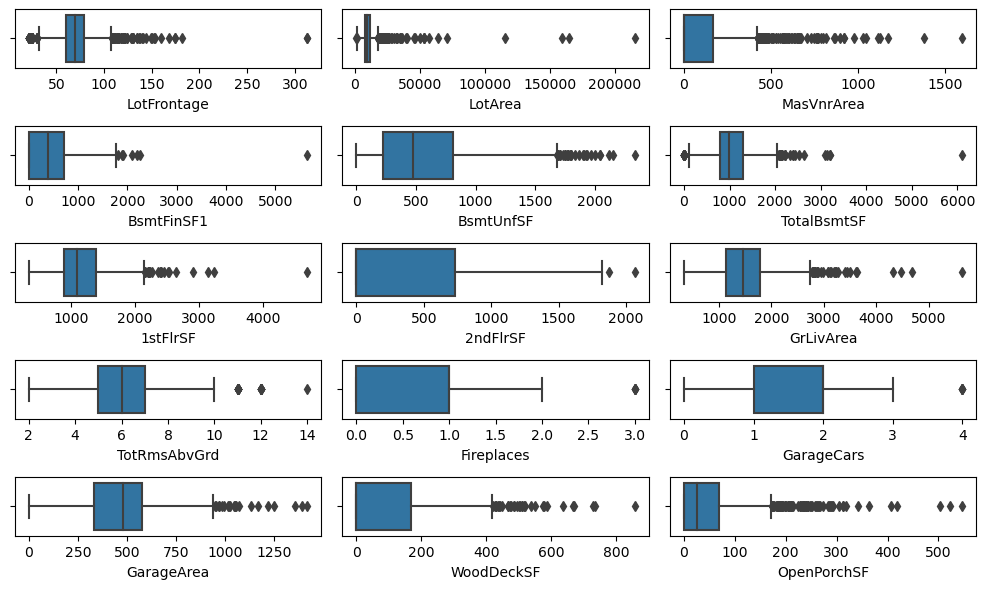

In [76]:
# Outlier Analysis
fig, axs = plt.subplots(5,3, figsize=(10,6))
plt1 = sns.boxplot(train_df2['LotFrontage'], ax = axs[0, 0])
plt2 = sns.boxplot(train_df2['LotArea'], ax = axs[0, 1])
plt3 = sns.boxplot(train_df2['MasVnrArea'], ax = axs[0, 2])
plt4 = sns.boxplot(train_df2['BsmtFinSF1'], ax = axs[1, 0])
plt5 = sns.boxplot(train_df2['BsmtUnfSF'], ax = axs[1, 1]) # BsmtFinSF2
plt6 = sns.boxplot(train_df2['TotalBsmtSF'], ax = axs[1, 2])
plt6 = sns.boxplot(train_df2['1stFlrSF'], ax = axs[2, 0])
plt6 = sns.boxplot(train_df2['2ndFlrSF'], ax = axs[2, 1])
plt6 = sns.boxplot(train_df2['GrLivArea'], ax = axs[2, 2])
plt6 = sns.boxplot(train_df2['TotRmsAbvGrd'], ax = axs[3, 0]) # LowQualFinSF
plt6 = sns.boxplot(train_df2['Fireplaces'], ax = axs[3, 1])
plt6 = sns.boxplot(train_df2['GarageCars'], ax = axs[3, 2])
plt6 = sns.boxplot(train_df2['GarageArea'], ax = axs[4, 0])
plt6 = sns.boxplot(train_df2['WoodDeckSF'], ax = axs[4, 1])
plt6 = sns.boxplot(train_df2['OpenPorchSF'], ax = axs[4, 2])
#plt6 = sns.boxplot(train_df2['SalePrice'], ax = axs[7, 0])

plt.tight_layout()

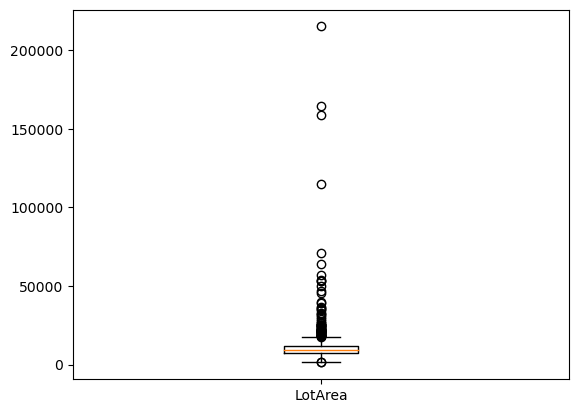

In [77]:
# Let us start with the 'LotArea' column
# Before dropping outlier from 'LotArea' column
plt.boxplot(train_df2.LotArea)
plt.xticks([1],['LotArea'])
plt.show()

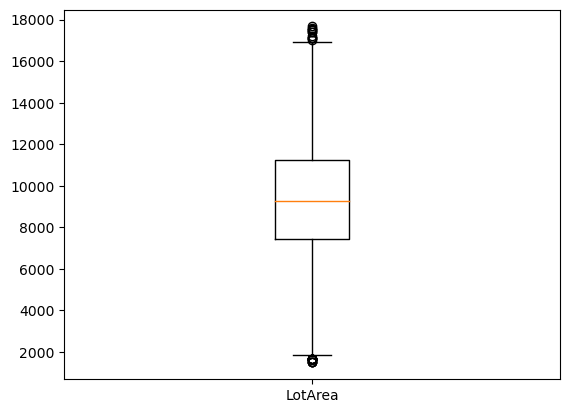

In [78]:
# Dropping outlier from 'LotArea' column
Q1 = train_df2.LotArea.quantile(0.25)
Q3 = train_df2.LotArea.quantile(0.75)
IQR = Q3 - Q1
train_df3 = train_df2[(train_df2.LotArea >= Q1-1.5*IQR) & (train_df2.LotArea <= Q3+1.5*IQR)]

# After dropping outlier from 'LotArea' column
plt.boxplot(train_df3.LotArea)
plt.xticks([1],['LotArea'])
plt.show()

In [79]:
train_df3.shape

(1391, 47)

In [80]:
print(len(train_df2))
print(len(train_df3))
print((len(train_df2)-(len(train_df2)-len(train_df3)))/len(train_df2)*100)

1460
1391
95.27397260273973


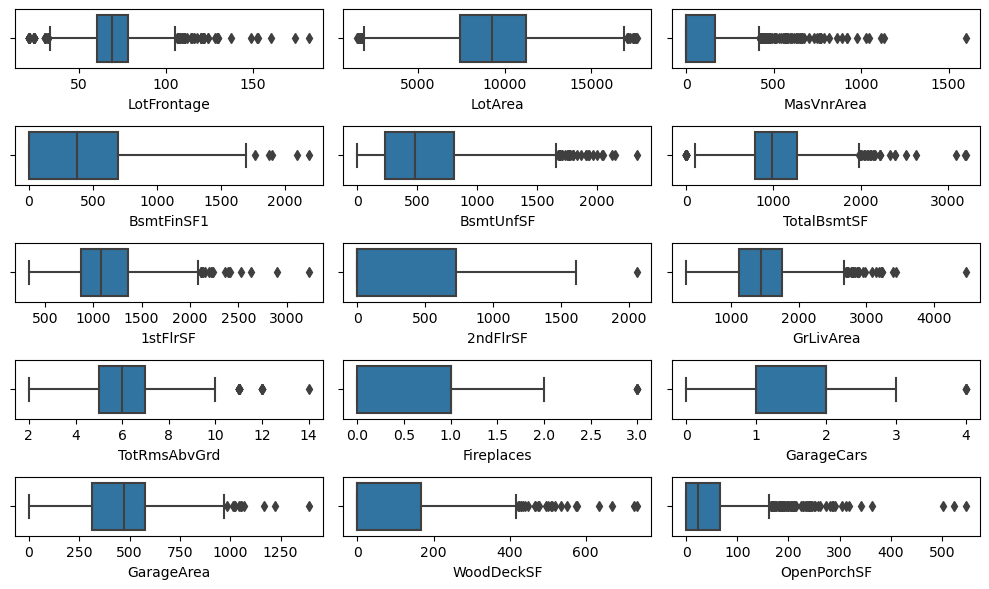

In [81]:
# Outlier Analysis
fig, axs = plt.subplots(5,3, figsize=(10,6))
plt1 = sns.boxplot(train_df3['LotFrontage'], ax = axs[0, 0])
plt2 = sns.boxplot(train_df3['LotArea'], ax = axs[0, 1])
plt3 = sns.boxplot(train_df3['MasVnrArea'], ax = axs[0, 2])
plt4 = sns.boxplot(train_df3['BsmtFinSF1'], ax = axs[1, 0])
plt5 = sns.boxplot(train_df3['BsmtUnfSF'], ax = axs[1, 1]) # BsmtFinSF2
plt6 = sns.boxplot(train_df3['TotalBsmtSF'], ax = axs[1, 2])
plt6 = sns.boxplot(train_df3['1stFlrSF'], ax = axs[2, 0])
plt6 = sns.boxplot(train_df3['2ndFlrSF'], ax = axs[2, 1])
plt6 = sns.boxplot(train_df3['GrLivArea'], ax = axs[2, 2])
plt6 = sns.boxplot(train_df3['TotRmsAbvGrd'], ax = axs[3, 0]) # LowQualFinSF
plt6 = sns.boxplot(train_df3['Fireplaces'], ax = axs[3, 1])
plt6 = sns.boxplot(train_df3['GarageCars'], ax = axs[3, 2])
plt6 = sns.boxplot(train_df3['GarageArea'], ax = axs[4, 0])
plt6 = sns.boxplot(train_df3['WoodDeckSF'], ax = axs[4, 1])
plt6 = sns.boxplot(train_df3['OpenPorchSF'], ax = axs[4, 2])

plt.tight_layout()

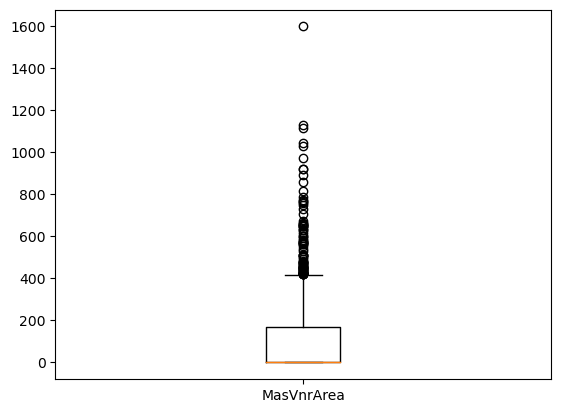

In [82]:
# Let us start with the 'MasVnrArea' column
# Before dropping outlier from 'MasVnrArea' column
plt.boxplot(train_df3.MasVnrArea)
plt.xticks([1],['MasVnrArea'])
plt.show()

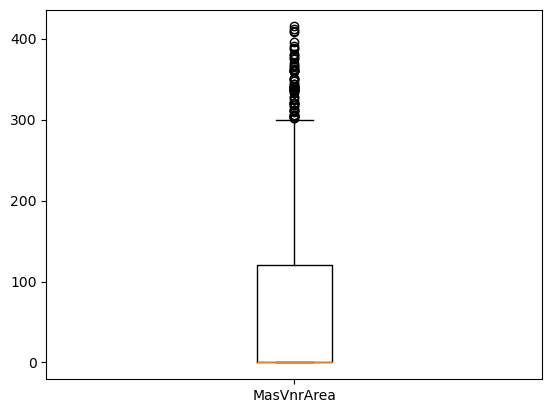

In [83]:
# Dropping outlier from 'MasVnrArea' column
Q1 = train_df3.MasVnrArea.quantile(0.25)
Q3 = train_df3.MasVnrArea.quantile(0.75)
IQR = Q3 - Q1
train_df3 = train_df3[(train_df3.MasVnrArea >= Q1-1.5*IQR) & (train_df3.MasVnrArea <= Q3+1.5*IQR)]

# After dropping outlier from 'MasVnrArea' column
plt.boxplot(train_df3.MasVnrArea)
plt.xticks([1],['MasVnrArea'])
plt.show()

In [84]:
print('Records in df2', len(train_df2))
print('Records in df3', len(train_df3))
print('Ratio after outlier removal', (len(train_df2)-(len(train_df2)-len(train_df3)))/len(train_df2)*100)

Records in df2 1460
Records in df3 1305
Ratio after outlier removal 89.38356164383562


This seems removing outlier losses lots of data items. <br/>
So let us remove data only below 0.01 or above 0.99 percentile.

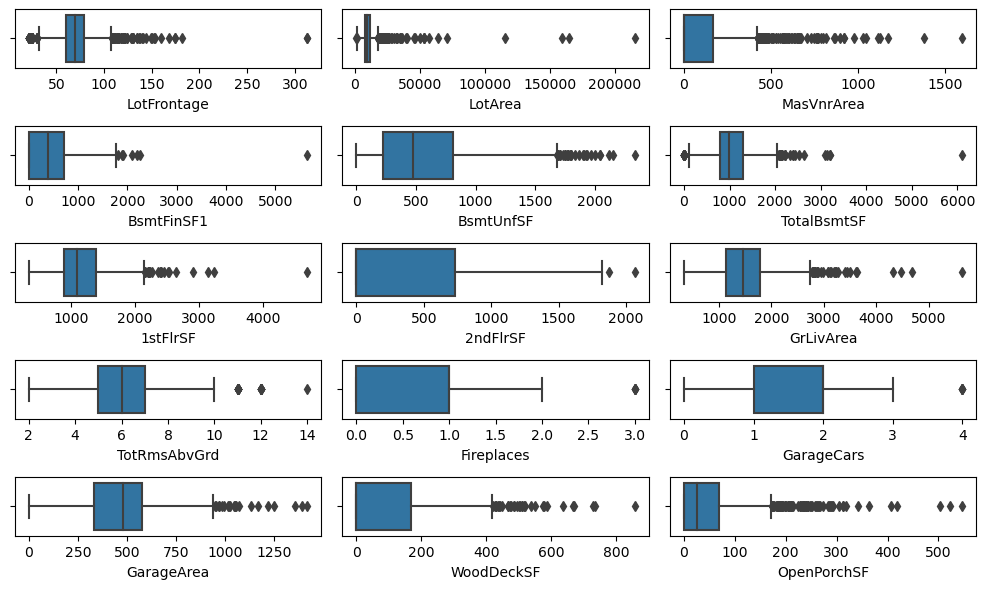

In [85]:
# Outlier Analysis
fig, axs = plt.subplots(5,3, figsize=(10,6))
plt1 = sns.boxplot(train_df2['LotFrontage'], ax = axs[0, 0])
plt2 = sns.boxplot(train_df2['LotArea'], ax = axs[0, 1])
plt3 = sns.boxplot(train_df2['MasVnrArea'], ax = axs[0, 2])
plt4 = sns.boxplot(train_df2['BsmtFinSF1'], ax = axs[1, 0])
plt5 = sns.boxplot(train_df2['BsmtUnfSF'], ax = axs[1, 1]) # BsmtFinSF2
plt6 = sns.boxplot(train_df2['TotalBsmtSF'], ax = axs[1, 2])
plt6 = sns.boxplot(train_df2['1stFlrSF'], ax = axs[2, 0])
plt6 = sns.boxplot(train_df2['2ndFlrSF'], ax = axs[2, 1])
plt6 = sns.boxplot(train_df2['GrLivArea'], ax = axs[2, 2])
plt6 = sns.boxplot(train_df2['TotRmsAbvGrd'], ax = axs[3, 0]) # LowQualFinSF
plt6 = sns.boxplot(train_df2['Fireplaces'], ax = axs[3, 1])
plt6 = sns.boxplot(train_df2['GarageCars'], ax = axs[3, 2])
plt6 = sns.boxplot(train_df2['GarageArea'], ax = axs[4, 0])
plt6 = sns.boxplot(train_df2['WoodDeckSF'], ax = axs[4, 1])
plt6 = sns.boxplot(train_df2['OpenPorchSF'], ax = axs[4, 2])

plt.tight_layout()

In [86]:
for i in range(0,len(dn)-1):
    qna = train_df2[dn[i]].quantile(0.01)
    qnb = train_df2[dn[i]].quantile(0.99)
    IQR = qnb - qna
    print(f"{i:2} {dn[i]:<15} {round(qna,2):10.2f} {round(qnb,2):10.2f} {round(IQR,2):10.2f}")

 0 LotFrontage          21.00     137.41     116.41
 1 LotArea            1680.00   37567.64   35887.64
 2 MasVnrArea            0.00     791.28     791.28
 3 BsmtFinSF1            0.00    1572.41    1572.41
 4 BsmtUnfSF             0.00    1797.05    1797.05
 5 TotalBsmtSF           0.00    2155.05    2155.05
 6 1stFlrSF            520.00    2219.46    1699.46
 7 2ndFlrSF              0.00    1418.92    1418.92
 8 GrLivArea           692.18    3123.48    2431.30
 9 TotRmsAbvGrd          3.00      11.00       8.00
10 Fireplaces            0.00       2.00       2.00
11 GarageCars            0.00       3.00       3.00
12 GarageArea            0.00    1002.79    1002.79
13 WoodDeckSF            0.00     505.46     505.46
14 OpenPorchSF           0.00     285.82     285.82


In [87]:
qna = train_df2.LotArea.quantile(0.01)
qnb = train_df2.LotArea.quantile(0.99)
train_df3 =  train_df2[(train_df2.LotArea >= qna) & (train_df2.LotArea <= qnb)]

In [88]:
len(train_df3)

1438

In [89]:
dna=['TotalBsmtSF','LotFrontage','BsmtFinSF1','BsmtUnfSF'] 
dnb=['MasVnrArea','1stFlrSF','GarageArea','GrLivArea','WoodDeckSF','OpenPorchSF']  

In [90]:
for i in range(0,len(dna)):
    qna = train_df3[dna[i]].quantile(0.01)
    qnb = train_df3[dna[i]].quantile(0.99)
    #train_df3 = train_df3[(train_df3[dna[i]] >= qna) & (train_df3[dna[i]] <= qnb)]
    print(f"{i:2} {dna[i]:<15} {round(qna,2):10.2f} {round(qnb,2):10.2f} {round(IQR,2):10.2f}")

 0 TotalBsmtSF           0.00    2130.45     285.82
 1 LotFrontage          21.00     134.00     285.82
 2 BsmtFinSF1            0.00    1557.01     285.82
 3 BsmtUnfSF             0.00    1798.15     285.82


In [91]:
for i in range(0,len(dnb)):    
    qna = train_df3[dnb[i]].quantile(0.01)
    qnb = train_df3[dnb[i]].quantile(0.99)
    train_df3 = train_df3[(train_df3[dnb[i]] <= qnb)]
    print(f"{i:2} {dnb[i]:<15} {round(qna,2):10.2f} {round(qnb,2):10.2f} {round(IQR,2):10.2f}")

 0 MasVnrArea            0.00     782.08     285.82
 1 1stFlrSF            520.00    2151.60     285.82
 2 GarageArea            0.00     967.02     285.82
 3 GrLivArea           707.20    2795.28     285.82
 4 WoodDeckSF            0.00     469.76     285.82
 5 OpenPorchSF           0.00     277.96     285.82


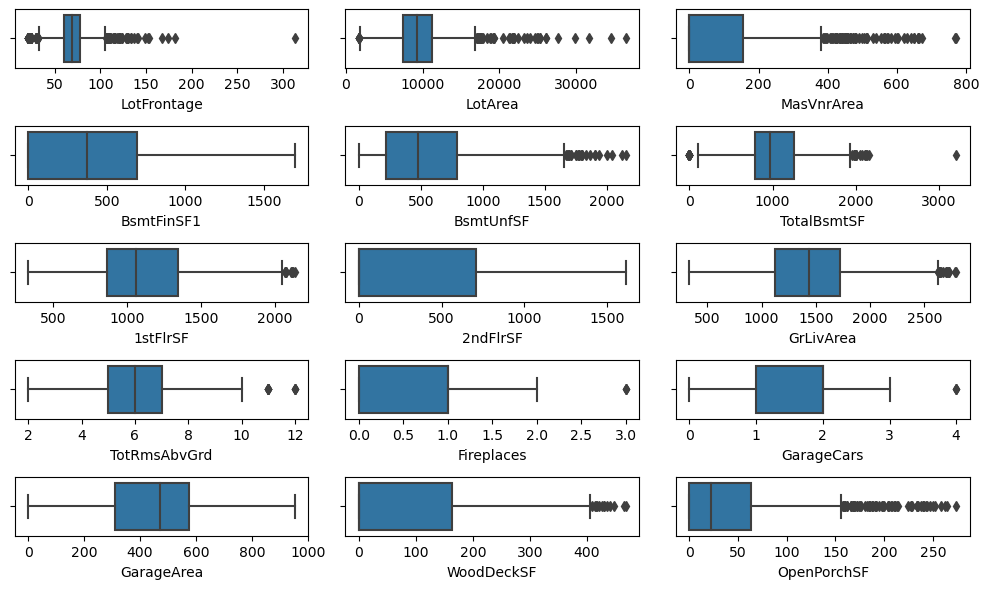

In [92]:
# Outlier Analysis
fig, axs = plt.subplots(5,3, figsize=(10,6))
plt1 = sns.boxplot(train_df3['LotFrontage'], ax = axs[0, 0])
plt2 = sns.boxplot(train_df3['LotArea'], ax = axs[0, 1])
plt3 = sns.boxplot(train_df3['MasVnrArea'], ax = axs[0, 2])
plt4 = sns.boxplot(train_df3['BsmtFinSF1'], ax = axs[1, 0])
plt5 = sns.boxplot(train_df3['BsmtUnfSF'], ax = axs[1, 1]) # BsmtFinSF2
plt6 = sns.boxplot(train_df3['TotalBsmtSF'], ax = axs[1, 2])
plt6 = sns.boxplot(train_df3['1stFlrSF'], ax = axs[2, 0])
plt6 = sns.boxplot(train_df3['2ndFlrSF'], ax = axs[2, 1])
plt6 = sns.boxplot(train_df3['GrLivArea'], ax = axs[2, 2])
plt6 = sns.boxplot(train_df3['TotRmsAbvGrd'], ax = axs[3, 0]) # LowQualFinSF
plt6 = sns.boxplot(train_df3['Fireplaces'], ax = axs[3, 1])
plt6 = sns.boxplot(train_df3['GarageCars'], ax = axs[3, 2])
plt6 = sns.boxplot(train_df3['GarageArea'], ax = axs[4, 0])
plt6 = sns.boxplot(train_df3['WoodDeckSF'], ax = axs[4, 1])
plt6 = sns.boxplot(train_df3['OpenPorchSF'], ax = axs[4, 2])

plt.tight_layout()

In [93]:
train_df3.shape

(1351, 47)

In [94]:
print('Records in df2', len(train_df2))
print('Records in df3', len(train_df3))
print('Ratio after outlier removal', (len(train_df2)-(len(train_df2)-len(train_df3)))/len(train_df2)*100)

Records in df2 1460
Records in df3 1351
Ratio after outlier removal 92.53424657534246


<strong>Outlier Analysis:</strong> 
Record reduction seems to be high. <br/>
Let us remove outliers from selected features.

In [95]:
qna = train_df2.LotArea.quantile(0.01)
qnb = train_df2.LotArea.quantile(0.99)
train_df3 =  train_df2[(train_df2.LotArea >= qna) & (train_df2.LotArea <= qnb)]

In [96]:
dna=['TotalBsmtSF'] # considering Total Basement area, - 'LotFrontage','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'
dnb=['MasVnrArea','GrLivArea','WoodDeckSF','OpenPorchSF'] 
    # ,'EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea'
    # '1stFlrSF','LowQualFinSF','GarageArea', 'MiscVal'

In [97]:
for i in range(0,len(dna)):
    qna = train_df3[dna[i]].quantile(0.01)
    qnb = train_df3[dna[i]].quantile(0.99)
    train_df3 = train_df3[(train_df3[dna[i]] >= qna) & (train_df3[dna[i]] <= qnb)]
    print(f"{i:2} {dna[i]:<15} {round(qna,2):10.2f} {round(qnb,2):10.2f} {round(IQR,2):10.2f}")
print(train_df3.shape)

 0 TotalBsmtSF           0.00    2130.45     285.82
(1423, 47)


In [98]:
for i in range(0,len(dnb)):    
    qna = train_df3[dnb[i]].quantile(0.01)
    qnb = train_df3[dnb[i]].quantile(0.99)
    train_df3 = train_df3[(train_df3[dnb[i]] <= qnb)]
    print(f"{i:2} {dnb[i]:<15} {round(qna,2):10.2f} {round(qnb,2):10.2f} {round(IQR,2):10.2f}")
print(train_df3.shape)

 0 MasVnrArea            0.00     718.24     285.82
 1 GrLivArea           708.84    2865.20     285.82
 2 WoodDeckSF            0.00     476.80     285.82
 3 OpenPorchSF           0.00     276.42     285.82
(1365, 47)


In [99]:
print('Records in df2', len(train_df2))
print('Records in df3', len(train_df3))
print('Ratio after outlier removal', (len(train_df2)-(len(train_df2)-len(train_df3)))/len(train_df2)*100)

Records in df2 1460
Records in df3 1365
Ratio after outlier removal 93.4931506849315


<strong>Outlier Analysis:</strong> Let us test on lesser fields.

In [100]:
qna = train_df2.LotArea.quantile(0.01)
qnb = train_df2.LotArea.quantile(0.99)
train_df3 =  train_df2[(train_df2.LotArea >= qna) & (train_df2.LotArea <= qnb)]

In [101]:
# dna=[] # considering Total Basement area, - 'LotFrontage','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'
dnb=['TotalBsmtSF','MasVnrArea','WoodDeckSF','OpenPorchSF'] 
    # '1stFlrSF','LowQualFinSF','GarageArea', 'MiscVal'    ,'EnclosedPorch', '3SsnPorch','ScreenPorch','PoolArea' ,'GrLivArea'

In [102]:
for i in range(0,len(dnb)):    
    qna = train_df3[dnb[i]].quantile(0.01)
    qnb = train_df3[dnb[i]].quantile(0.99)
    train_df3 = train_df3[(train_df3[dnb[i]] <= qnb)]
    print(f"{i:2} {dnb[i]:<15} {round(qna,2):10.2f} {round(qnb,2):10.2f} {round(IQR,2):10.2f}")
print(train_df3.shape)
print('Ratio after outlier removal', (len(train_df2)-(len(train_df2)-len(train_df3)))/len(train_df2)*100)

 0 TotalBsmtSF           0.00    2130.45     285.82
 1 MasVnrArea            0.00     718.24     285.82
 2 WoodDeckSF            0.00     485.30     285.82
 3 OpenPorchSF           0.00     274.88     285.82
(1379, 47)
Ratio after outlier removal 94.45205479452055


### Checking colinearity between columns

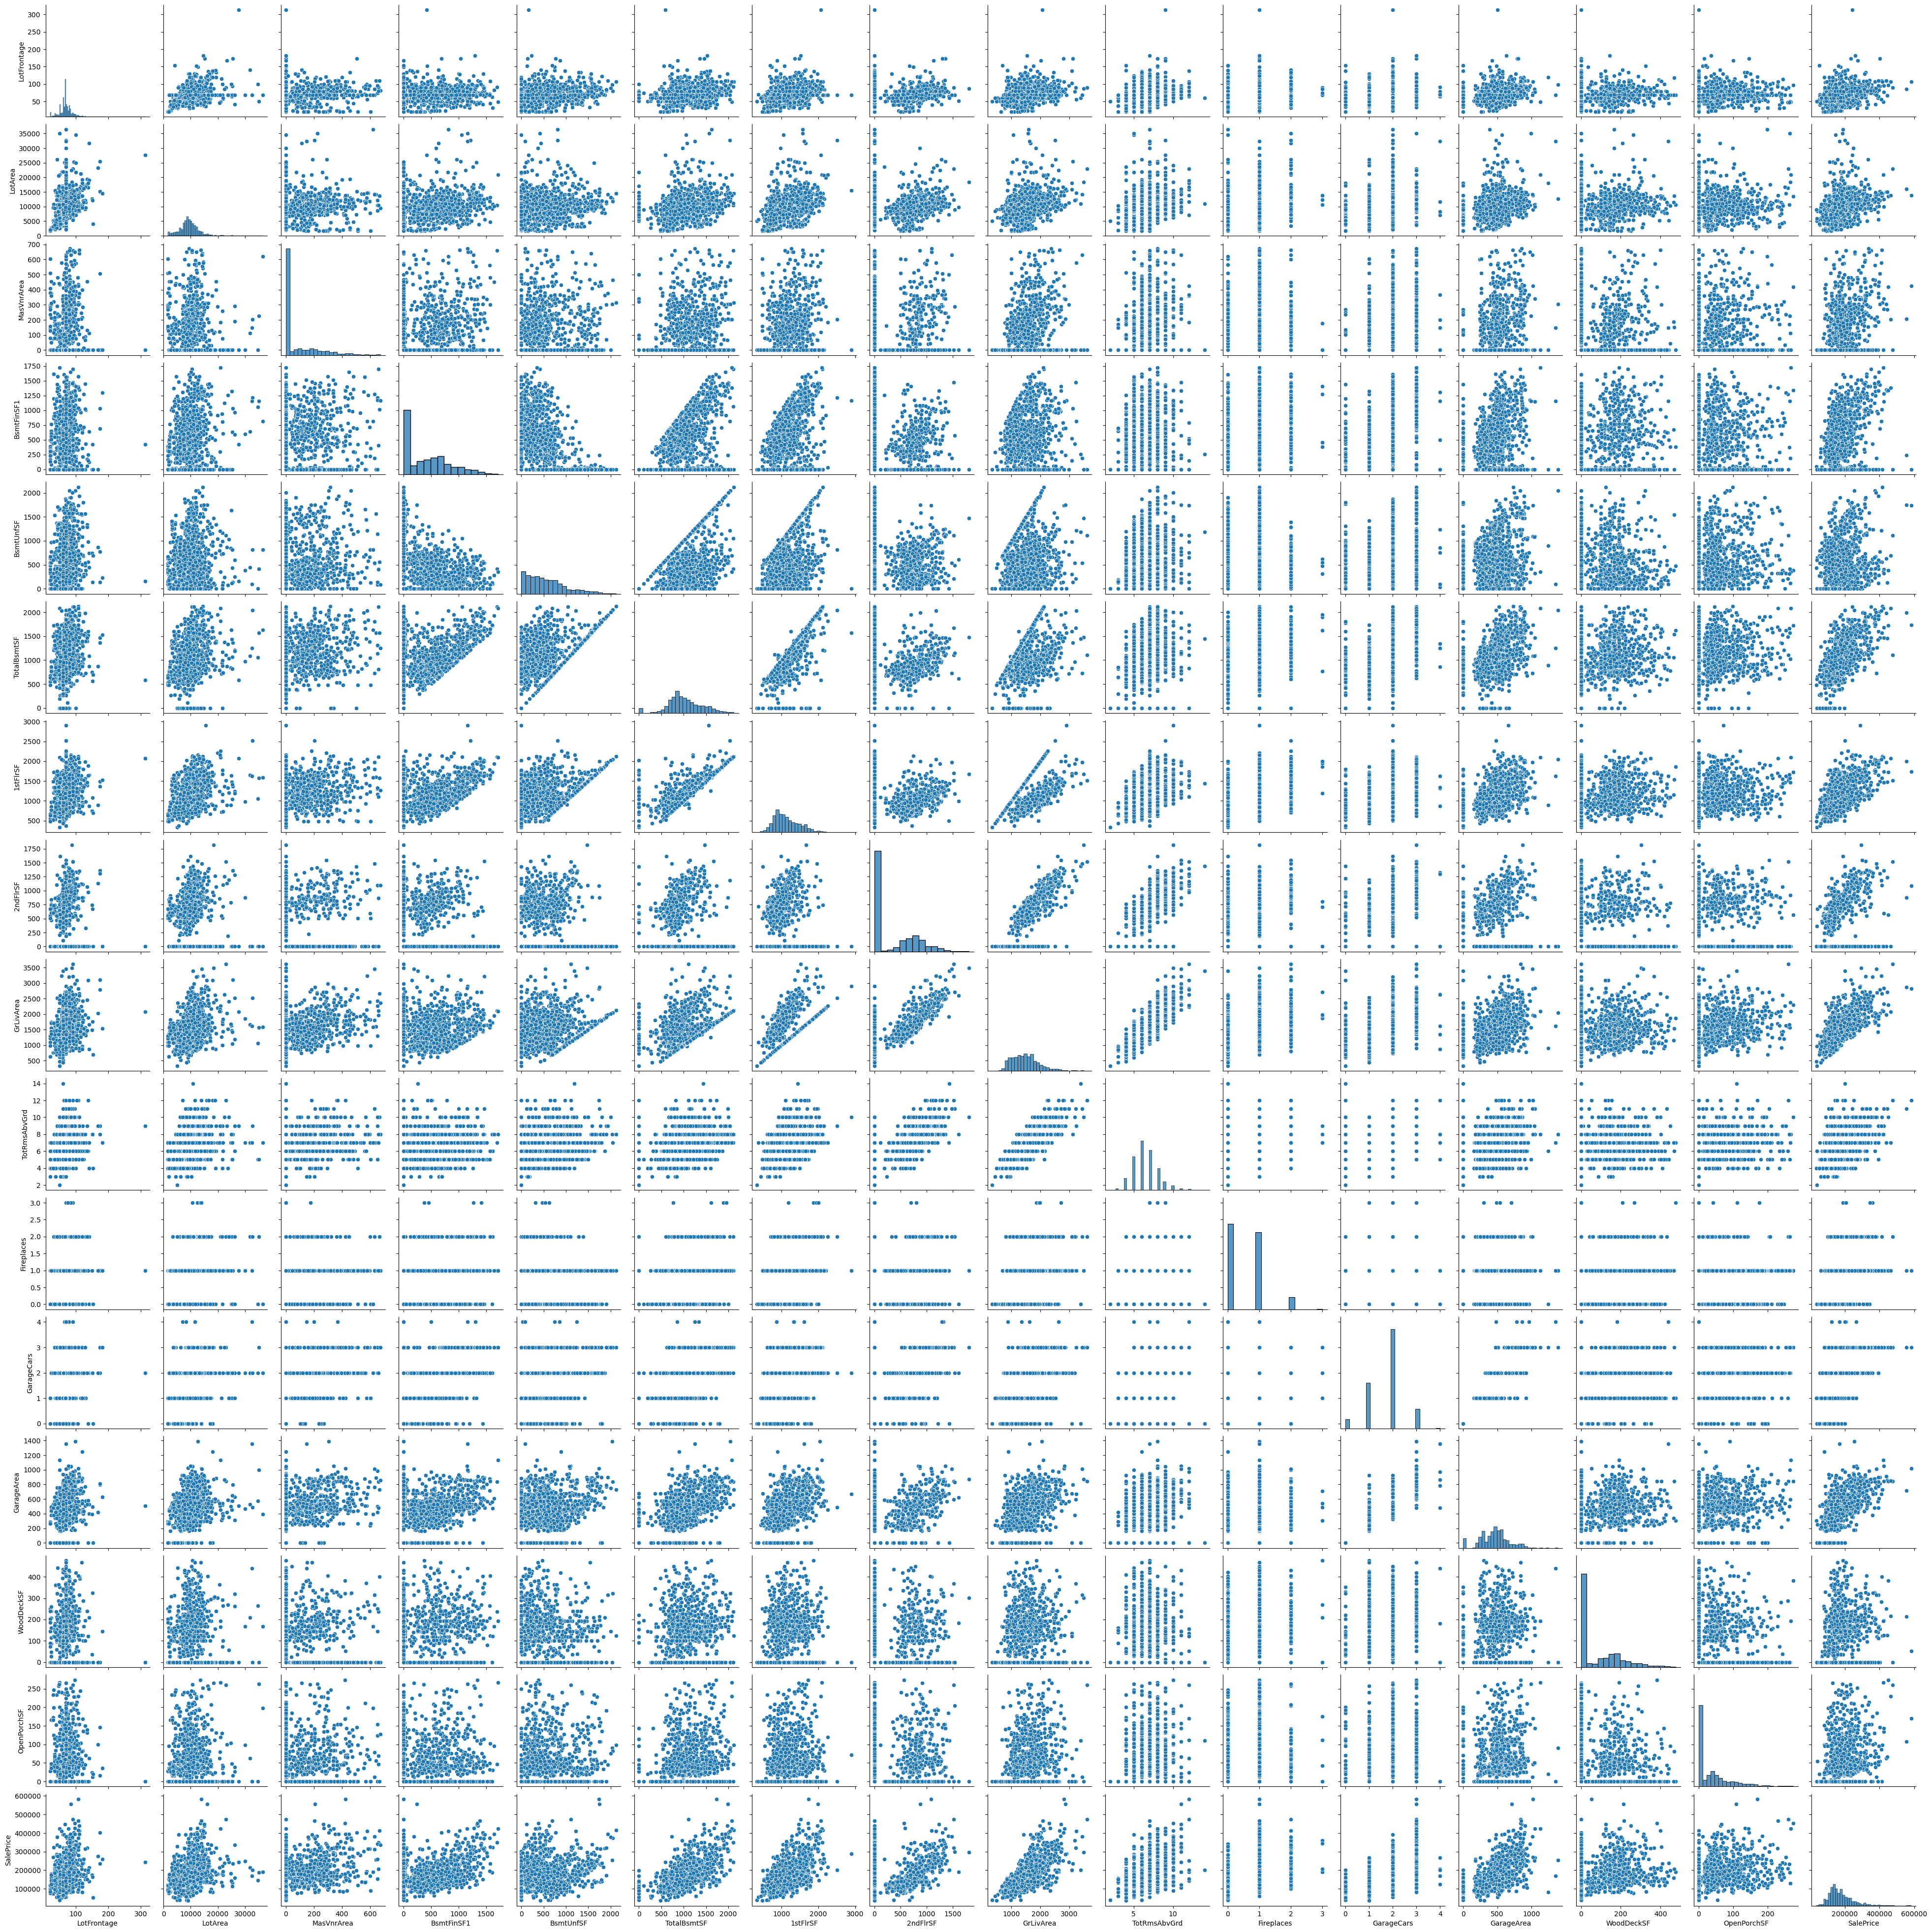

In [103]:
# Let us visualize correlation between all numerical variables
sns.pairplot(train_df3, vars=train_df3[['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtUnfSF',
                                         'TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea', 'TotRmsAbvGrd','Fireplaces',
                                         'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF', 'SalePrice']])
plt.show()

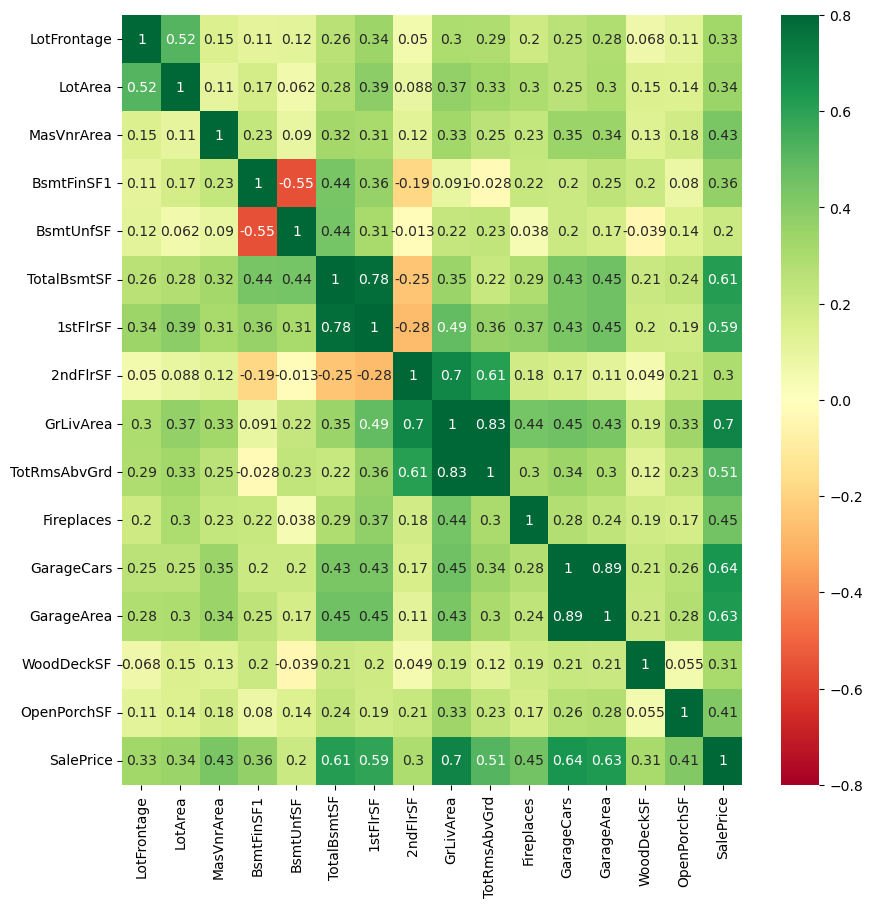

In [104]:
# Heatmap relation betweeen numeric columns
corr = train_df3[dn].corr()
fig = plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, vmax=0.8, vmin=-0.8, cmap='RdYlGn')
plt.show()

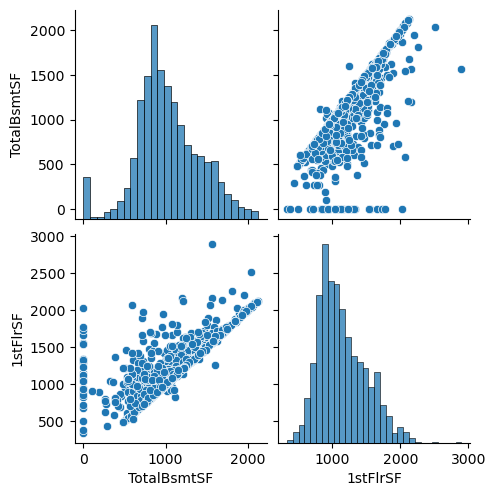

In [105]:
# Let us visualize correlation between TotalBsmtSF and 1stFlrSF features
sns.pairplot(train_df3, vars=["TotalBsmtSF","1stFlrSF"]) 
plt.show()

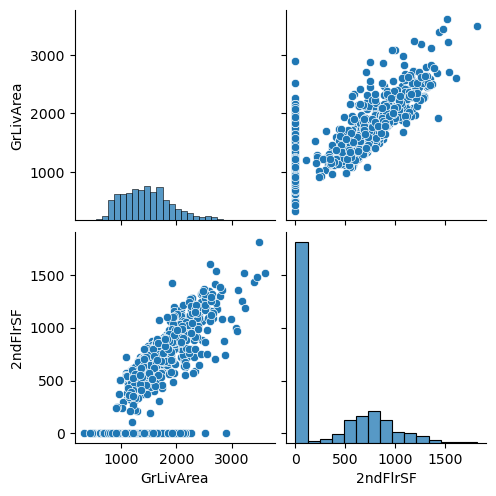

In [106]:
# Let us visualize correlation between GrLivArea and TotRmsAbvGrd features
sns.pairplot(train_df3, vars=["GrLivArea","2ndFlrSF"]) 
plt.show()

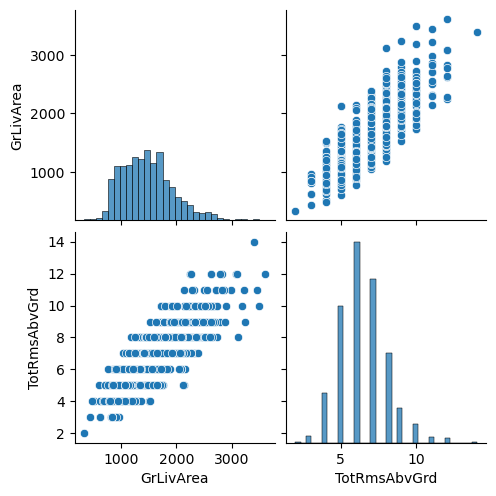

In [107]:
# Let us visualize correlation between GrLivArea and TotRmsAbvGrd features
sns.pairplot(train_df3, vars=["GrLivArea","TotRmsAbvGrd"])
plt.show()

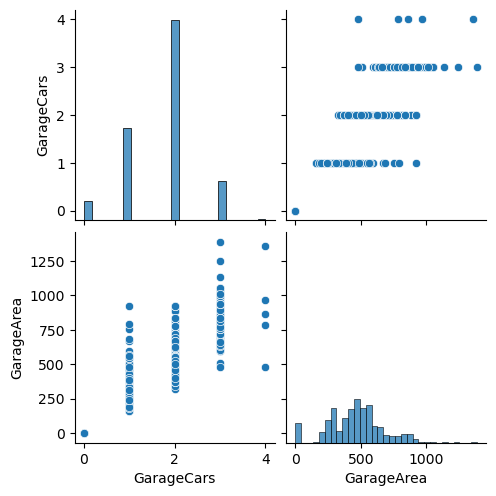

In [108]:
# Let us visualize correlation between GarageCars and GarageArea features
sns.pairplot(train_df3, vars=["GarageCars","GarageArea"]) 
plt.show()

As per above charts, we can drop any variable from the above highly corelated pair of variables.

In [109]:
train_df4 = train_df3.drop(['TotRmsAbvGrd','2ndFlrSF','1stFlrSF', 'GarageArea'], axis=1)
train_df4.shape

(1379, 43)

In [110]:
train_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1458
Data columns (total 43 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1379 non-null   int64  
 1   MSZoning      1379 non-null   object 
 2   LotFrontage   1379 non-null   float64
 3   LotArea       1379 non-null   int64  
 4   LotShape      1379 non-null   object 
 5   LotConfig     1379 non-null   object 
 6   Neighborhood  1379 non-null   object 
 7   HouseStyle    1379 non-null   object 
 8   OverallQual   1379 non-null   int64  
 9   OverallCond   1379 non-null   int64  
 10  YearBuilt     1379 non-null   int64  
 11  YearRemodAdd  1379 non-null   int64  
 12  RoofStyle     1379 non-null   object 
 13  Exterior1st   1379 non-null   object 
 14  Exterior2nd   1379 non-null   object 
 15  MasVnrType    1379 non-null   object 
 16  MasVnrArea    1379 non-null   float64
 17  ExterQual     1379 non-null   object 
 18  Foundation    1379 non-null 

### Creating Derived Columns
As per the data description, Remodel date is same as construction date if no remodeling or additions. <br/>
Thus, let us calculate the property age and Remodel staus based on YearBuilt, YrSold and YearRemodAdd years.

In [111]:
train_df4["PropertyAge"] = train_df4.YrSold - train_df4.YearBuilt

In [112]:
train_df4["IsRemodelled"] = (train_df4.YearRemodAdd - train_df4.YearBuilt >= 1).astype(int)

In [113]:
train_df4.shape

(1379, 45)

Let us delete above year fields now as those seems to be categorical fields and no more required in further analysis. <br/>
We'll also delete additional more granular and unrelated fields 'MoSold' and 'GarageYrBlt' which are not required in further analysis.

In [114]:
train_df4 = train_df4.drop(['YrSold','YearBuilt','YearRemodAdd','MoSold','GarageYrBlt'], axis=1)
train_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1458
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1379 non-null   int64  
 1   MSZoning      1379 non-null   object 
 2   LotFrontage   1379 non-null   float64
 3   LotArea       1379 non-null   int64  
 4   LotShape      1379 non-null   object 
 5   LotConfig     1379 non-null   object 
 6   Neighborhood  1379 non-null   object 
 7   HouseStyle    1379 non-null   object 
 8   OverallQual   1379 non-null   int64  
 9   OverallCond   1379 non-null   int64  
 10  RoofStyle     1379 non-null   object 
 11  Exterior1st   1379 non-null   object 
 12  Exterior2nd   1379 non-null   object 
 13  MasVnrType    1379 non-null   object 
 14  MasVnrArea    1379 non-null   float64
 15  ExterQual     1379 non-null   object 
 16  Foundation    1379 non-null   object 
 17  BsmtQual      1379 non-null   object 
 18  BsmtExposure  1379 non-null 

### Dummy Variables

As per the Data Description, features MSZoning, LotShape, LotConfig, etc., contains different categorical values, which represents specific labels associated with them. Let us create numericals columns (dummy) based on teh available categorical data values.

In [115]:
Cols_4_dummy = []
for i in range(0,train_df4.shape[1]):
    if train_df4[train_df4.columns[i]].dtype == 'object':
            print(i+1,
                  train_df4[train_df4.columns[i]].dtype, 
                  train_df4.columns[i], 
                  train_df4[train_df4.columns[i]].value_counts().max()/1460*100, 
                  train_df4[train_df4.columns[i]].nunique(), sep=" | ") 
            Cols_4_dummy.append(train_df4.columns[i])
print(Cols_4_dummy) 

2 | object | MSZoning | 74.72602739726028 | 5
5 | object | LotShape | 60.82191780821918 | 4
6 | object | LotConfig | 68.4931506849315 | 5
7 | object | Neighborhood | 14.931506849315069 | 25
8 | object | HouseStyle | 47.397260273972606 | 8
11 | object | RoofStyle | 75.13698630136987 | 6
12 | object | Exterior1st | 33.83561643835616 | 15
13 | object | Exterior2nd | 33.082191780821915 | 16
14 | object | MasVnrType | 56.43835616438356 | 5
16 | object | ExterQual | 59.45205479452055 | 4
17 | object | Foundation | 41.43835616438356 | 6
18 | object | BsmtQual | 43.15068493150685 | 5
19 | object | BsmtExposure | 62.671232876712324 | 5
20 | object | BsmtFinType1 | 28.356164383561644 | 7
24 | object | HeatingQC | 47.671232876712324 | 5
30 | object | KitchenQual | 48.08219178082192 | 4
32 | object | FireplaceQu | 46.02739726027397 | 6
33 | object | GarageType | 55.821917808219176 | 7
34 | object | GarageFinish | 39.93150684931507 | 4
['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseSty

#### Creating dummy variables for 'MSZoning' feature

In [116]:
# Creating dummy variables for 'MSZoning' feature and saving into new dataframe 'status'
train_df4.MSZoning.value_counts()

RL         1091
RM          203
FV           60
RH           16
C (all)       9
Name: MSZoning, dtype: int64

In [117]:
status = pd.get_dummies(train_df4['MSZoning'], drop_first=True)
status

FV  RH  RL  RM
0      0   0   1   0
1      0   0   1   0
2      0   0   1   0
3      0   0   1   0
4      0   0   1   0
...   ..  ..  ..  ..
1454   1   0   0   0
1455   0   0   1   0
1456   0   0   1   0
1457   0   0   1   0
1458   0   0   1   0

[1379 rows x 4 columns]

In [118]:
# Merging the dummy variables with the original dataframe and creating a new dataframe
train_df5 = pd.concat([train_df4,status], axis=1)

In [119]:
# Drop the original field as we have created the dummies for it
train_df5.drop(['MSZoning'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea LotShape LotConfig Neighborhood  \
0          60         65.0     8450      Reg    Inside      CollgCr   
1          20         80.0     9600      Reg       FR2      Veenker   
2          60         68.0    11250      IR1    Inside      CollgCr   
3          70         60.0     9550      IR1    Corner      Crawfor   
4          60         84.0    14260      IR1       FR2      NoRidge   

  HouseStyle  OverallQual  OverallCond RoofStyle  ... GarageCars WoodDeckSF  \
0     2Story            7            5     Gable  ...          2          0   
1     1Story            6            8     Gable  ...          2        298   
2     2Story            7            5     Gable  ...          2          0   
3     2Story            7            5     Gable  ...          3          0   
4     2Story            8            5     Gable  ...          3        192   

  OpenPorchSF  SalePrice PropertyAge IsRemodelled FV RH RL  RM  
0          61     208500           5            0  0  0  1   0  
1           0     181500          31            0  0  0  1   0  
2          42     223500           7            1  0  0  1   0  
3          35     140000          91            1  0  0  1   0  
4          84     250000           8            0  0  0  1   0  

[5 rows x 43 columns]

#### Creating dummy variables for 'LotShape' feature

In [120]:
# Creating dummy variables for 'LotShape' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['LotShape'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['LotShape'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea LotConfig Neighborhood HouseStyle  \
0          60         65.0     8450    Inside      CollgCr     2Story   
1          20         80.0     9600       FR2      Veenker     1Story   
2          60         68.0    11250    Inside      CollgCr     2Story   
3          70         60.0     9550    Corner      Crawfor     2Story   
4          60         84.0    14260       FR2      NoRidge     2Story   

   OverallQual  OverallCond RoofStyle Exterior1st  ... SalePrice PropertyAge  \
0            7            5     Gable     VinylSd  ...    208500           5   
1            6            8     Gable     MetalSd  ...    181500          31   
2            7            5     Gable     VinylSd  ...    223500           7   
3            7            5     Gable     Wd Sdng  ...    140000          91   
4            8            5     Gable     VinylSd  ...    250000           8   

   IsRemodelled FV RH RL RM IR2  IR3  Reg  
0             0  0  0  1  0   0    0    1  
1             0  0  0  1  0   0    0    1  
2             1  0  0  1  0   0    0    0  
3             1  0  0  1  0   0    0    0  
4             0  0  0  1  0   0    0    0  

[5 rows x 45 columns]

#### Creating dummy variables for 'LotConfig' feature

In [121]:
# Creating dummy variables for 'LotConfig' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['LotConfig'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['LotConfig'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea Neighborhood HouseStyle  OverallQual  \
0          60         65.0     8450      CollgCr     2Story            7   
1          20         80.0     9600      Veenker     1Story            6   
2          60         68.0    11250      CollgCr     2Story            7   
3          70         60.0     9550      Crawfor     2Story            7   
4          60         84.0    14260      NoRidge     2Story            8   

   OverallCond RoofStyle Exterior1st Exterior2nd  ... RH  RL RM IR2 IR3 Reg  \
0            5     Gable     VinylSd     VinylSd  ...  0   1  0   0   0   1   
1            8     Gable     MetalSd     MetalSd  ...  0   1  0   0   0   1   
2            5     Gable     VinylSd     VinylSd  ...  0   1  0   0   0   0   
3            5     Gable     Wd Sdng     Wd Shng  ...  0   1  0   0   0   0   
4            5     Gable     VinylSd     VinylSd  ...  0   1  0   0   0   0   

  CulDSac  FR2  FR3  Inside  
0       0    0    0       1  
1       0    1    0       0  
2       0    0    0       1  
3       0    0    0       0  
4       0    1    0       0  

[5 rows x 48 columns]

#### Creating dummy variables for 'Neighborhood' feature

In [122]:
# Creating dummy variables for 'Neighborhood' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['Neighborhood'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['Neighborhood'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea HouseStyle  OverallQual  OverallCond  \
0          60         65.0     8450     2Story            7            5   
1          20         80.0     9600     1Story            6            8   
2          60         68.0    11250     2Story            7            5   
3          70         60.0     9550     2Story            7            5   
4          60         84.0    14260     2Story            8            5   

  RoofStyle Exterior1st Exterior2nd MasVnrType  ...  NoRidge NridgHt OldTown  \
0     Gable     VinylSd     VinylSd    BrkFace  ...        0       0       0   
1     Gable     MetalSd     MetalSd       None  ...        0       0       0   
2     Gable     VinylSd     VinylSd    BrkFace  ...        0       0       0   
3     Gable     Wd Sdng     Wd Shng       None  ...        0       0       0   
4     Gable     VinylSd     VinylSd    BrkFace  ...        1       0       0   

  SWISU Sawyer SawyerW  Somerst  StoneBr  Timber Veenker  
0     0      0       0        0        0       0       0  
1     0      0       0        0        0       0       1  
2     0      0       0        0        0       0       0  
3     0      0       0        0        0       0       0  
4     0      0       0        0        0       0       0  

[5 rows x 71 columns]

#### Creating dummy variables for 'HouseStyle' feature

In [123]:
# Creating dummy variables for 'HouseStyle' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['HouseStyle'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['HouseStyle'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond RoofStyle  \
0          60         65.0     8450            7            5     Gable   
1          20         80.0     9600            6            8     Gable   
2          60         68.0    11250            7            5     Gable   
3          70         60.0     9550            7            5     Gable   
4          60         84.0    14260            8            5     Gable   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea  ... StoneBr Timber Veenker  \
0     VinylSd     VinylSd    BrkFace       196.0  ...       0      0       0   
1     MetalSd     MetalSd       None         0.0  ...       0      0       1   
2     VinylSd     VinylSd    BrkFace       162.0  ...       0      0       0   
3     Wd Sdng     Wd Shng       None         0.0  ...       0      0       0   
4     VinylSd     VinylSd    BrkFace       350.0  ...       0      0       0   

  1.5Unf 1Story  2.5Fin  2.5Unf  2Story SFoyer  SLvl  
0      0      0       0       0       1      0     0  
1      0      1       0       0       0      0     0  
2      0      0       0       0       1      0     0  
3      0      0       0       0       1      0     0  
4      0      0       0       0       1      0     0  

[5 rows x 77 columns]

#### Creating dummy variables for 'RoofStyle' feature

In [124]:
# Creating dummy variables for 'RoofStyle' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['RoofStyle'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['RoofStyle'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond Exterior1st  \
0          60         65.0     8450            7            5     VinylSd   
1          20         80.0     9600            6            8     MetalSd   
2          60         68.0    11250            7            5     VinylSd   
3          70         60.0     9550            7            5     Wd Sdng   
4          60         84.0    14260            8            5     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual  ... 2.5Fin 2.5Unf 2Story  \
0     VinylSd    BrkFace       196.0        Gd  ...      0      0      1   
1     MetalSd       None         0.0        TA  ...      0      0      0   
2     VinylSd    BrkFace       162.0        Gd  ...      0      0      1   
3     Wd Shng       None         0.0        TA  ...      0      0      1   
4     VinylSd    BrkFace       350.0        Gd  ...      0      0      1   

  SFoyer  SLvl  Gable  Gambrel Hip  Mansard  Shed  
0      0     0      1        0   0        0     0  
1      0     0      1        0   0        0     0  
2      0     0      1        0   0        0     0  
3      0     0      1        0   0        0     0  
4      0     0      1        0   0        0     0  

[5 rows x 81 columns]

#### Creating dummy variables for 'Exterior1st' feature

In [125]:
# Creating dummy variables for 'Exterior1st' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['Exterior1st'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['Exterior1st'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond Exterior2nd  \
0          60         65.0     8450            7            5     VinylSd   
1          20         80.0     9600            6            8     MetalSd   
2          60         68.0    11250            7            5     VinylSd   
3          70         60.0     9550            7            5     Wd Shng   
4          60         84.0    14260            8            5     VinylSd   

  MasVnrType  MasVnrArea ExterQual Foundation  ... CemntBd HdBoard ImStucc  \
0    BrkFace       196.0        Gd      PConc  ...       0       0       0   
1       None         0.0        TA     CBlock  ...       0       0       0   
2    BrkFace       162.0        Gd      PConc  ...       0       0       0   
3       None         0.0        TA     BrkTil  ...       0       0       0   
4    BrkFace       350.0        Gd      PConc  ...       0       0       0   

   MetalSd  Plywood  Stone Stucco  VinylSd  Wd Sdng  WdShing  
0        0        0      0      0        1        0        0  
1        1        0      0      0        0        0        0  
2        0        0      0      0        1        0        0  
3        0        0      0      0        0        1        0  
4        0        0      0      0        1        0        0  

[5 rows x 94 columns]

#### Creating dummy variables for 'Exterior2nd' feature

In [126]:
# Creating dummy variables for 'Exterior2nd' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['Exterior2nd'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['Exterior2nd'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond MasVnrType  \
0          60         65.0     8450            7            5    BrkFace   
1          20         80.0     9600            6            8       None   
2          60         68.0    11250            7            5    BrkFace   
3          70         60.0     9550            7            5       None   
4          60         84.0    14260            8            5    BrkFace   

   MasVnrArea ExterQual Foundation BsmtQual  ... HdBoard ImStucc  MetalSd  \
0       196.0        Gd      PConc       Gd  ...       0       0        0   
1         0.0        TA     CBlock       Gd  ...       0       0        1   
2       162.0        Gd      PConc       Gd  ...       0       0        0   
3         0.0        TA     BrkTil       TA  ...       0       0        0   
4       350.0        Gd      PConc       Gd  ...       0       0        0   

   Other  Plywood Stone  Stucco  VinylSd  Wd Sdng  Wd Shng  
0      0        0     0       0        1        0        0  
1      0        0     0       0        0        0        0  
2      0        0     0       0        1        0        0  
3      0        0     0       0        0        0        1  
4      0        0     0       0        1        0        0  

[5 rows x 108 columns]

#### Creating dummy variables for 'MasVnrType' feature

In [127]:
# Creating dummy variables for 'MasVnrType' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['MasVnrType'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['MasVnrType'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

  ExterQual Foundation BsmtQual BsmtExposure  ... Plywood  Stone  Stucco  \
0        Gd      PConc       Gd           No  ...       0      0       0   
1        TA     CBlock       Gd           Gd  ...       0      0       0   
2        Gd      PConc       Gd           Mn  ...       0      0       0   
3        TA     BrkTil       TA           No  ...       0      0       0   
4        Gd      PConc       Gd           Av  ...       0      0       0   

   VinylSd Wd Sdng  Wd Shng  BrkFace  NA  None  Stone  
0        1       0        0        1   0     0      0  
1        0       0        0        0   0     1      0  
2        1       0        0        1   0     0      0  
3        0       0        1        0   0     1      0  
4        1       0        0        1   0     0      0  

[5 rows x 111 columns]

#### Creating dummy variables for 'ExterQual' feature

In [128]:
# Creating dummy variables for 'ExterQual' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['ExterQual'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['ExterQual'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

  Foundation BsmtQual BsmtExposure BsmtFinType1  ...  VinylSd  Wd Sdng  \
0      PConc       Gd           No          GLQ  ...        1        0   
1     CBlock       Gd           Gd          ALQ  ...        0        0   
2      PConc       Gd           Mn          GLQ  ...        1        0   
3     BrkTil       TA           No          ALQ  ...        0        0   
4      PConc       Gd           Av          GLQ  ...        1        0   

   Wd Shng BrkFace  NA  None  Stone  Fa  Gd TA  
0        0       1   0     0      0   0   1  0  
1        0       0   0     1      0   0   0  1  
2        0       1   0     0      0   0   1  0  
3        1       0   0     1      0   0   0  1  
4        0       1   0     0      0   0   1  0  

[5 rows x 113 columns]

#### Creating dummy variables for 'Foundation' feature

In [129]:
# Creating dummy variables for 'Foundation' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['Foundation'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['Foundation'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

  BsmtQual BsmtExposure BsmtFinType1  BsmtFinSF1  ...  None Stone Fa  Gd  TA  \
0       Gd           No          GLQ         706  ...     0     0  0   1   0   
1       Gd           Gd          ALQ         978  ...     1     0  0   0   1   
2       Gd           Mn          GLQ         486  ...     0     0  0   1   0   
3       TA           No          ALQ         216  ...     1     0  0   0   1   
4       Gd           Av          GLQ         655  ...     0     0  0   1   0   

   CBlock  PConc  Slab Stone  Wood  
0       0      1     0     0     0  
1       1      0     0     0     0  
2       0      1     0     0     0  
3       0      0     0     0     0  
4       0      1     0     0     0  

[5 rows x 117 columns]

#### Creating dummy variables for 'BsmtQual' feature

In [130]:
# Creating dummy variables for 'BsmtQual' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['BsmtQual'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['BsmtQual'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

  BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtUnfSF  ... TA CBlock  PConc  \
0           No          GLQ         706        150  ...  0      0      1   
1           Gd          ALQ         978        284  ...  1      1      0   
2           Mn          GLQ         486        434  ...  0      0      1   
3           No          ALQ         216        540  ...  1      0      0   
4           Av          GLQ         655        490  ...  0      0      1   

   Slab  Stone  Wood  Fa Gd  NA TA  
0     0      0     0   0  1   0  0  
1     0      0     0   0  1   0  0  
2     0      0     0   0  1   0  0  
3     0      0     0   0  0   0  1  
4     0      0     0   0  1   0  0  

[5 rows x 120 columns]

#### Creating dummy variables for 'BsmtExposure' feature

In [131]:
# Creating dummy variables for 'BsmtExposure' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['BsmtExposure'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['BsmtExposure'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

  BsmtFinType1  BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  ... Stone  Wood  Fa Gd NA  \
0          GLQ         706        150          856  ...     0     0   0  1  0   
1          ALQ         978        284         1262  ...     0     0   0  1  0   
2          GLQ         486        434          920  ...     0     0   0  1  0   
3          ALQ         216        540          756  ...     0     0   0  0  0   
4          GLQ         655        490         1145  ...     0     0   0  1  0   

   TA Gd  Mn NA No  
0   0  0   0  0  1  
1   0  1   0  0  0  
2   0  0   1  0  0  
3   1  0   0  0  1  
4   0  0   0  0  0  

[5 rows x 123 columns]

#### Creating dummy variables for 'BsmtFinType1' feature

In [132]:
# Creating dummy variables for 'BsmtFinType1' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['BsmtFinType1'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['BsmtFinType1'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF HeatingQC  ...  Gd  Mn NA  No  BLQ GLQ  \
0         706        150          856        Ex  ...   0   0  0   1    0   1   
1         978        284         1262        Ex  ...   1   0  0   0    0   0   
2         486        434          920        Ex  ...   0   1  0   0    0   1   
3         216        540          756        Gd  ...   0   0  0   1    0   0   
4         655        490         1145        Ex  ...   0   0  0   0    0   1   

   LwQ NA Rec Unf  
0    0  0   0   0  
1    0  0   0   0  
2    0  0   0   0  
3    0  0   0   0  
4    0  0   0   0  

[5 rows x 128 columns]

#### Creating dummy variables for 'HeatingQC' feature

In [133]:
# Creating dummy variables for 'HeatingQC' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['HeatingQC'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['HeatingQC'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  BLQ  GLQ  LwQ  NA Rec  \
0         706        150          856       1710  ...    0    1    0   0   0   
1         978        284         1262       1262  ...    0    0    0   0   0   
2         486        434          920       1786  ...    0    1    0   0   0   
3         216        540          756       1717  ...    0    0    0   0   0   
4         655        490         1145       2198  ...    0    1    0   0   0   

   Unf Fa Gd Po  TA  
0    0  0  0  0   0  
1    0  0  0  0   0  
2    0  0  0  0   0  
3    0  0  1  0   0  
4    0  0  0  0   0  

[5 rows x 131 columns]

#### Creating dummy variables for 'KitchenQual' feature

In [134]:
# Creating dummy variables for 'KitchenQual' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['KitchenQual'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['KitchenQual'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  NA  Rec  Unf Fa  Gd Po  \
0         706        150          856       1710  ...   0    0    0  0   0  0   
1         978        284         1262       1262  ...   0    0    0  0   0  0   
2         486        434          920       1786  ...   0    0    0  0   0  0   
3         216        540          756       1717  ...   0    0    0  0   1  0   
4         655        490         1145       2198  ...   0    0    0  0   0  0   

   TA Fa  Gd  TA  
0   0  0   1   0  
1   0  0   0   1  
2   0  0   1   0  
3   0  0   1   0  
4   0  0   1   0  

[5 rows x 133 columns]

#### Creating dummy variables for 'FireplaceQu' feature

In [135]:
# Creating dummy variables for 'FireplaceQu' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['FireplaceQu'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['FireplaceQu'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  Po  TA Fa Gd  TA Fa Gd  \
0         706        150          856       1710  ...   0   0  0  1   0  0  0   
1         978        284         1262       1262  ...   0   0  0  0   1  0  0   
2         486        434          920       1786  ...   0   0  0  1   0  0  0   
3         216        540          756       1717  ...   0   0  0  1   0  0  1   
4         655        490         1145       2198  ...   0   0  0  1   0  0  0   

   NA  Po  TA  
0   1   0   0  
1   0   0   1  
2   0   0   1  
3   0   0   0  
4   0   0   1  

[5 rows x 137 columns]

#### Creating dummy variables for 'GarageType' feature

In [136]:
# Creating dummy variables for 'GarageType' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['GarageType'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['GarageType'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  Gd  NA  Po  TA  Attchd  \
0         706        150          856       1710  ...   0   1   0   0       1   
1         978        284         1262       1262  ...   0   0   0   1       1   
2         486        434          920       1786  ...   0   0   0   1       1   
3         216        540          756       1717  ...   1   0   0   0       0   
4         655        490         1145       2198  ...   0   0   0   1       1   

  Basment  BuiltIn  CarPort  Detchd  NA  
0       0        0        0       0   0  
1       0        0        0       0   0  
2       0        0        0       0   0  
3       0        0        0       1   0  
4       0        0        0       0   0  

[5 rows x 142 columns]

#### Creating dummy variables for 'GarageFinish' feature

In [137]:
# Creating dummy variables for 'GarageFinish' feature and saving into new dataframe 'status'
# Also we'll drop the first column as it can be identified with the help of remaining columns
status = pd.get_dummies(train_df5['GarageFinish'], drop_first=True)
status.head()

# Merging the dummy variables with the original dataframe
train_df5 = pd.concat([train_df5,status], axis=1)

# Drop the original field as we have created the dummies for it
train_df5.drop(['GarageFinish'], axis = 1, inplace = True)
train_df5.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  TA  Attchd  Basment  \
0         706        150          856       1710  ...   0       1        0   
1         978        284         1262       1262  ...   1       1        0   
2         486        434          920       1786  ...   1       1        0   
3         216        540          756       1717  ...   0       0        0   
4         655        490         1145       2198  ...   1       1        0   

   BuiltIn  CarPort  Detchd  NA  NA  RFn  Unf  
0        0        0       0   0   0    1    0  
1        0        0       0   0   0    1    0  
2        0        0       0   0   0    1    0  
3        0        0       1   0   0    0    1  
4        0        0       0   0   0    1    0  

[5 rows x 144 columns]

In [138]:
train_df5.shape

(1379, 144)

In [139]:
train_df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1458
Columns: 144 entries, MSSubClass to Unf
dtypes: float64(2), int32(1), int64(18), uint8(123)
memory usage: 429.6 KB


In [140]:
train_df5.columns.to_list()

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'PropertyAge',
 'IsRemodelled',
 'FV',
 'RH',
 'RL',
 'RM',
 'IR2',
 'IR3',
 'Reg',
 'CulDSac',
 'FR2',
 'FR3',
 'Inside',
 'Blueste',
 'BrDale',
 'BrkSide',
 'ClearCr',
 'CollgCr',
 'Crawfor',
 'Edwards',
 'Gilbert',
 'IDOTRR',
 'MeadowV',
 'Mitchel',
 'NAmes',
 'NPkVill',
 'NWAmes',
 'NoRidge',
 'NridgHt',
 'OldTown',
 'SWISU',
 'Sawyer',
 'SawyerW',
 'Somerst',
 'StoneBr',
 'Timber',
 'Veenker',
 '1.5Unf',
 '1Story',
 '2.5Fin',
 '2.5Unf',
 '2Story',
 'SFoyer',
 'SLvl',
 'Gable',
 'Gambrel',
 'Hip',
 'Mansard',
 'Shed',
 'AsphShn',
 'BrkComm',
 'BrkFace',
 'CBlock',
 'CemntBd',
 'HdBoard',
 'ImStucc',
 'MetalSd',
 'Plywood',
 'Stone',
 'Stucco',
 'VinylSd',
 'Wd Sdng',
 'WdShing',
 'AsphShn',
 'Brk Cmn',

We can see that few column names are repeated. So let us try adding prefix to the column names.

In [141]:
Cols_4_dummy

['MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageFinish']

In [142]:
train_df5 = train_df4.copy()
for i in range(0,len(Cols_4_dummy)):
    print(Cols_4_dummy[i])
    status = pd.get_dummies(train_df5[Cols_4_dummy[i]], drop_first=True, prefix=Cols_4_dummy[i])
    print(status.head())
    train_df5 = pd.concat([train_df5,status], axis=1)
    train_df5.drop([Cols_4_dummy[i]], axis = 1, inplace = True)
train_df5.head()

MSZoning
   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0            0            0            1            0
1            0            0            1            0
2            0            0            1            0
3            0            0            1            0
4            0            0            1            0
LotShape
   LotShape_IR2  LotShape_IR3  LotShape_Reg
0             0             0             1
1             0             0             1
2             0             0             0
3             0             0             0
4             0             0             0
LotConfig
   LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside
0                  0              0              0                 1
1                  0              1              0                 0
2                  0              0              0                 1
3                  0              0              0                 0
4                  0              1    

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  ...  FireplaceQu_TA  \
0         706        150          856       1710  ...               0   
1         978        284         1262       1262  ...               1   
2         486        434          920       1786  ...               1   
3         216        540          756       1717  ...               0   
4         655        490         1145       2198  ...               1   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   
3                  0                   0                   0   
4                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_NA  GarageFinish_NA  \
0                   0                  0              0                0   
1                   0                  0              0                0   
2                   0                  0              0                0   
3                   0                  1              0                0   
4                   0                  0              0                0   

   GarageFinish_RFn  GarageFinish_Unf  
0                 1                 0  
1                 1                 0  
2                 1                 0  
3                 0                 1  
4                 1                 0  

[5 rows x 144 columns]

Let us check for the numeric variables.

In [143]:
# train_df5 contains new dummy variables, hence, picking numeric variables from train_df4 dataframe.
for i in range(0,train_df4.shape[1]):
    if train_df4[train_df4.columns[i]].dtype != 'object':
        print(train_df4.columns[i],end="','")

MSSubClass','LotFrontage','LotArea','OverallQual','OverallCond','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF','GrLivArea','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','Fireplaces','GarageCars','WoodDeckSF','OpenPorchSF','SalePrice','PropertyAge','IsRemodelled','

### Dummy Encoding for Numeric but categorical feature

As per the Data Dictionary, feature 'MSSubClass' contains numerical values which have specific labels associated with them. As per the labels and the nature of the features there is no order in these values, hence, let us convert thid feature values into categorical string values for further processing.

In [144]:
train_df5.MSSubClass.value_counts()

20     508
60     274
50     141
120     83
30      68
160     58
70      57
80      56
90      52
190     28
85      20
75      13
45      12
180      5
40       4
Name: MSSubClass, dtype: int64

In [145]:
val = sorted(train_df5.MSSubClass.value_counts().index.to_list())
ind = [sorted(val).index(x) for x in val]
dct = dict(zip(val, ind))
print(dct)

{20: 0, 30: 1, 40: 2, 45: 3, 50: 4, 60: 5, 70: 6, 75: 7, 80: 8, 85: 9, 90: 10, 120: 11, 160: 12, 180: 13, 190: 14}


In [146]:
train_df5.MSSubClass.map(dct).value_counts()

0     508
5     274
4     141
11     83
1      68
12     58
6      57
8      56
10     52
14     28
9      20
7      13
3      12
13      5
2       4
Name: MSSubClass, dtype: int64

In [147]:
train_df5.MSSubClass = train_df5.MSSubClass.map(dct)

#### Let us create dummy variable for this field

In [148]:
status = pd.get_dummies(train_df5['MSSubClass'], drop_first=True, prefix='MSSubClass')
train_df5 = pd.concat([train_df5,status], axis=1)
# Delete the original field as we have created dummy fields now
train_df5.drop('MSSubClass', axis = 1, inplace = True)
train_df5.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtUnfSF  TotalBsmtSF  GrLivArea  BsmtFullBath  ...  MSSubClass_5  \
0        150          856       1710             1  ...             1   
1        284         1262       1262             0  ...             0   
2        434          920       1786             1  ...             1   
3        540          756       1717             1  ...             0   
4        490         1145       2198             1  ...             1   

   MSSubClass_6  MSSubClass_7  MSSubClass_8  MSSubClass_9  MSSubClass_10  \
0             0             0             0             0              0   
1             0             0             0             0              0   
2             0             0             0             0              0   
3             1             0             0             0              0   
4             0             0             0             0              0   

   MSSubClass_11  MSSubClass_12  MSSubClass_13  MSSubClass_14  
0              0              0              0              0  
1              0              0              0              0  
2              0              0              0              0  
3              0              0              0              0  
4              0              0              0              0  

[5 rows x 157 columns]

# Let's check the correlation 

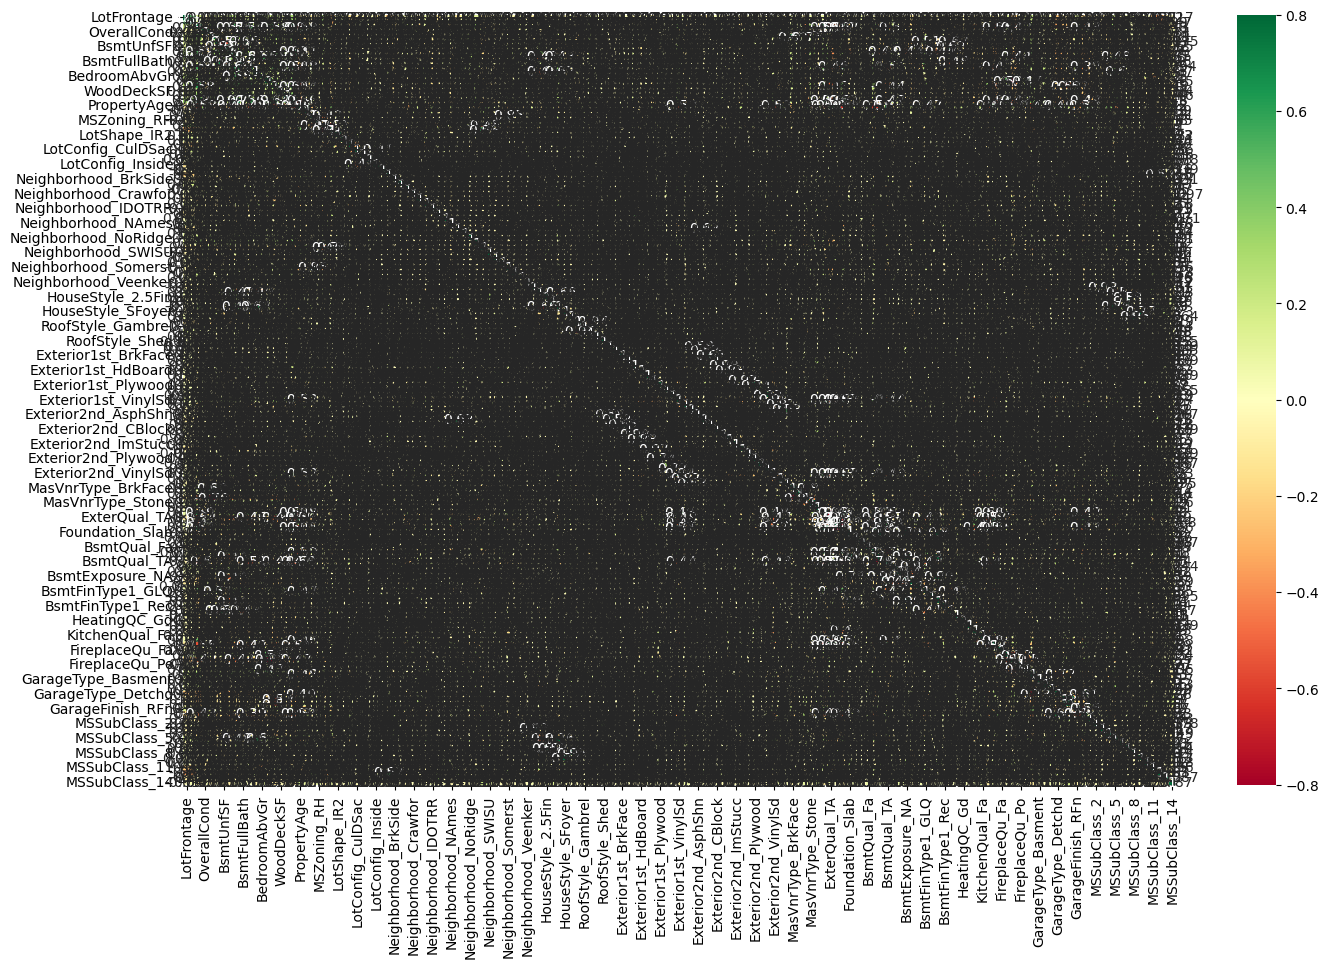

In [149]:
# Let's check the correlation, coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(train_df5.corr(), annot = True, 
            vmax=0.8, vmin=-0.8, 
            cmap='RdYlGn') #cmap="YlGnBu")
plt.show()

In [150]:
# Since we have too many numerical variables, let us check in the dataframe format
train_df5.corr()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
LotFrontage       1.000000  0.516699     0.186378    -0.042581    0.149446   
LotArea           0.516699  1.000000     0.134630    -0.028091    0.105888   
OverallQual       0.186378  0.134630     1.000000    -0.090070    0.371321   
OverallCond      -0.042581 -0.028091    -0.090070     1.000000   -0.129431   
MasVnrArea        0.149446  0.105888     0.371321    -0.129431    1.000000   
...                    ...       ...          ...          ...         ...   
MSSubClass_10     0.017669  0.000948    -0.161879    -0.116398    0.030111   
MSSubClass_11    -0.232816 -0.270299     0.191097    -0.120469    0.015628   
MSSubClass_12    -0.368478 -0.357983     0.022625    -0.066755    0.087719   
MSSubClass_13    -0.117653 -0.099131    -0.047582     0.001073   -0.017516   
MSSubClass_14    -0.017074  0.046690    -0.113553     0.031087   -0.079786   

               BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  BsmtFullBath  \
LotFrontage      0.108563   0.116124     0.258357   0.298912      0.056311   
LotArea          0.174567   0.062490     0.278848   0.366878      0.093309   
OverallQual      0.195736   0.286098     0.507469   0.561318      0.106589   
OverallCond     -0.029582  -0.141661    -0.173550  -0.077575     -0.046375   
MasVnrArea       0.227630   0.090062     0.321791   0.326009      0.096142   
...                   ...        ...          ...        ...           ...   
MSSubClass_10   -0.008310  -0.018316    -0.036449   0.035629      0.034134   
MSSubClass_11    0.104733   0.050508     0.168322  -0.089639      0.106291   
MSSubClass_12   -0.083057  -0.080952    -0.184312  -0.060318     -0.084064   
MSSubClass_13    0.001733  -0.072052    -0.070400  -0.074948      0.069431   
MSSubClass_14   -0.003521  -0.055440    -0.080134   0.035034      0.024824   

               ...  MSSubClass_5  MSSubClass_6  MSSubClass_7  MSSubClass_8  \
LotFrontage    ...      0.179575     -0.047843      0.057784      0.066885   
LotArea        ...      0.174994      0.013241      0.053873      0.049896   
OverallQual    ...      0.342863      0.014703      0.024870     -0.009967   
OverallCond    ...     -0.121907      0.201904      0.036656      0.057578   
MasVnrArea     ...      0.175478     -0.125561     -0.061700      0.036384   
...            ...           ...           ...           ...           ...   
MSSubClass_10  ...     -0.098574     -0.041104     -0.019311     -0.040727   
MSSubClass_11  ...     -0.126017     -0.052548     -0.024688     -0.052066   
MSSubClass_12  ...     -0.104341     -0.043510     -0.020441     -0.043110   
MSSubClass_13  ...     -0.030039     -0.012526     -0.005885     -0.012411   
MSSubClass_14  ...     -0.071688     -0.029893     -0.014044     -0.029619   

               MSSubClass_9  MSSubClass_10  MSSubClass_11  MSSubClass_12  \
LotFrontage        0.007606       0.017669      -0.232816      -0.368478   
LotArea           -0.011345       0.000948      -0.270299      -0.357983   
OverallQual       -0.054537      -0.161879       0.191097       0.022625   
OverallCond        0.056439      -0.116398      -0.120469      -0.066755   
MasVnrArea        -0.031666       0.030111       0.015628       0.087719   
...                     ...            ...            ...            ...   
MSSubClass_10     -0.024014       1.000000      -0.050096      -0.041479   
MSSubClass_11     -0.030700      -0.050096       1.000000      -0.053027   
MSSubClass_12     -0.025420      -0.041479      -0.053027       1.000000   
MSSubClass_13     -0.007318      -0.011941      -0.015266      -0.012640   
MSSubClass_14     -0.017465      -0.028498      -0.036432      -0.030166   

               MSSubClass_13  MSSubClass_14  
LotFrontage        -0.117653      -0.017074  
LotArea            -0.099131       0.046690  
OverallQual        -0.047582      -0.113553  
OverallCond         0.001073       0.031087  
MasVnrArea         -0.017516      -0.079786  
...            

In [151]:
train_df5.corr()>=0.7

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
LotFrontage           True    False        False        False       False   
LotArea              False     True        False        False       False   
OverallQual          False    False         True        False       False   
OverallCond          False    False        False         True       False   
MasVnrArea           False    False        False        False        True   
...                    ...      ...          ...          ...         ...   
MSSubClass_10        False    False        False        False       False   
MSSubClass_11        False    False        False        False       False   
MSSubClass_12        False    False        False        False       False   
MSSubClass_13        False    False        False        False       False   
MSSubClass_14        False    False        False        False       False   

               BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  GrLivArea  BsmtFullBath  \
LotFrontage         False      False        False      False         False   
LotArea             False      False        False      False         False   
OverallQual         False      False        False      False         False   
OverallCond         False      False        False      False         False   
MasVnrArea          False      False        False      False         False   
...                   ...        ...          ...        ...           ...   
MSSubClass_10       False      False        False      False         False   
MSSubClass_11       False      False        False      False         False   
MSSubClass_12       False      False        False      False         False   
MSSubClass_13       False      False        False      False         False   
MSSubClass_14       False      False        False      False         False   

               ...  MSSubClass_5  MSSubClass_6  MSSubClass_7  MSSubClass_8  \
LotFrontage    ...         False         False         False         False   
LotArea        ...         False         False         False         False   
OverallQual    ...         False         False         False         False   
OverallCond    ...         False         False         False         False   
MasVnrArea     ...         False         False         False         False   
...            ...           ...           ...           ...           ...   
MSSubClass_10  ...         False         False         False         False   
MSSubClass_11  ...         False         False         False         False   
MSSubClass_12  ...         False         False         False         False   
MSSubClass_13  ...         False         False         False         False   
MSSubClass_14  ...         False         False         False         False   

               MSSubClass_9  MSSubClass_10  MSSubClass_11  MSSubClass_12  \
LotFrontage           False          False          False          False   
LotArea               False          False          False          False   
OverallQual           False          False          False          False   
OverallCond           False          False          False          False   
MasVnrArea            False          False          False          False   
...                     ...            ...            ...            ...   
MSSubClass_10         False           True          False          False   
MSSubClass_11         False          False           True          False   
MSSubClass_12         False          False          False           True   
MSSubClass_13         False          False          False          False   
MSSubClass_14         False          False          False          False   

               MSSubClass_13  MSSubClass_14  
LotFrontage            False          False  
LotArea                False          False  
OverallQual            False          False  
OverallCond            False          False  
MasVnrArea             False          False  
...                      ..

In [152]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [153]:
train_df5.corr()[(train_df5.corr()>=0.7) | (train_df5.corr()<=-0.7)]

LotFrontage  LotArea  OverallQual  OverallCond  \
LotFrontage                   1.0      NaN          NaN          NaN   
LotArea                       NaN      1.0          NaN          NaN   
OverallQual                   NaN      NaN     1.000000          NaN   
OverallCond                   NaN      NaN          NaN          1.0   
MasVnrArea                    NaN      NaN          NaN          NaN   
BsmtFinSF1                    NaN      NaN          NaN          NaN   
BsmtUnfSF                     NaN      NaN          NaN          NaN   
TotalBsmtSF                   NaN      NaN          NaN          NaN   
GrLivArea                     NaN      NaN          NaN          NaN   
BsmtFullBath                  NaN      NaN          NaN          NaN   
FullBath                      NaN      NaN          NaN          NaN   
HalfBath                      NaN      NaN          NaN          NaN   
BedroomAbvGr                  NaN      NaN          NaN          NaN   
Fireplaces                    NaN      NaN          NaN          NaN   
GarageCars                    NaN      NaN          NaN          NaN   
WoodDeckSF                    NaN      NaN          NaN          NaN   
OpenPorchSF                   NaN      NaN          NaN          NaN   
SalePrice                     NaN      NaN     0.799303          NaN   
PropertyAge                   NaN      NaN          NaN          NaN   
IsRemodelled                  NaN      NaN          NaN          NaN   
MSZoning_FV                   NaN      NaN          NaN          NaN   
MSZoning_RH                   NaN      NaN          NaN          NaN   
MSZoning_RL                   NaN      NaN          NaN          NaN   
MSZoning_RM                   NaN      NaN          NaN          NaN   
LotShape_IR2                  NaN      NaN          NaN          NaN   
LotShape_IR3                  NaN      NaN          NaN          NaN   
LotShape_Reg                  NaN      NaN          NaN          NaN   
LotConfig_CulDSac             NaN      NaN          NaN          NaN   
LotConfig_FR2                 NaN      NaN          NaN          NaN   
LotConfig_FR3                 NaN      NaN          NaN          NaN   
LotConfig_Inside              NaN      NaN          NaN          NaN   
Neighborhood_Blueste          NaN      NaN          NaN          NaN   
Neighborhood_BrDale           NaN      NaN          NaN          NaN   
Neighborhood_BrkSide          NaN      NaN          NaN          NaN   
Neighborhood_ClearCr          NaN      NaN          NaN          NaN   
Neighborhood_CollgCr          NaN      NaN          NaN          NaN   
Neighborhood_Crawfor          NaN      NaN          NaN          NaN   
Neighborhood_Edwards          NaN      NaN          NaN          NaN   
Neighborhood_Gilbert          NaN      NaN          NaN          NaN   
Neighborhood_IDOTRR           NaN      NaN          NaN          NaN   
Neighborhood_MeadowV          NaN      NaN          NaN          NaN   
Neighborhood_Mitchel          NaN      NaN          NaN          NaN   
Neighborhood_NAmes            NaN      NaN          NaN          NaN   
Neighborhood_NPkVill          NaN      NaN          NaN          NaN   
Neighborhood_NWAmes           NaN      NaN          NaN          NaN   
Neighborhood_NoRidge          NaN      NaN          NaN          NaN   
Neighborhood_NridgHt          NaN      NaN          NaN          NaN   
Neighborhood_OldTown          NaN      NaN          NaN          NaN   
Neighborhood_SWISU            NaN      NaN          NaN          NaN   
Neighborhood_Sawyer           NaN      NaN          NaN          NaN   
Neighborhood_SawyerW          NaN      NaN          NaN          NaN   
Neighborhood_Somerst          NaN      NaN          NaN          NaN   
Neighborhood_StoneBr          NaN      NaN          NaN          NaN   
Neighborhood_Timber           NaN      NaN          NaN          NaN   
Neighborhood_Veenker          NaN      NaN          NaN       

In [154]:
train_df5.corr()[train_df5.corr().MasVnrArea.index!='MasVnrArea'].MasVnrArea.values < -0.7

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [155]:
train_df5.corr()[
    train_df5.corr().MasVnrArea.index!='MasVnrArea'][
        train_df5.corr()[
            train_df5.corr().MasVnrArea.index!='MasVnrArea'].MasVnrArea.values < -0.7].index

Index(['MasVnrType_None'], dtype='object')

In [156]:
for i in range(0,train_df5.shape[1]):
    print(train_df5.columns[i],
         train_df5.corr()[
         train_df5.corr()[train_df5.columns[i]].index!=train_df5.columns[i]][
            train_df5.corr()[
                train_df5.corr()[train_df5.columns[i]].index!=train_df5.columns[i]][train_df5.columns[i]].values < -0.7].index)

LotFrontage Index([], dtype='object')
LotArea Index([], dtype='object')
OverallQual Index([], dtype='object')
OverallCond Index([], dtype='object')
MasVnrArea Index(['MasVnrType_None'], dtype='object')
BsmtFinSF1 Index([], dtype='object')
BsmtUnfSF Index([], dtype='object')
TotalBsmtSF Index([], dtype='object')
GrLivArea Index([], dtype='object')
BsmtFullBath Index([], dtype='object')
FullBath Index([], dtype='object')
HalfBath Index([], dtype='object')
BedroomAbvGr Index([], dtype='object')
Fireplaces Index(['FireplaceQu_NA'], dtype='object')
GarageCars Index([], dtype='object')
WoodDeckSF Index([], dtype='object')
OpenPorchSF Index([], dtype='object')
SalePrice Index([], dtype='object')
PropertyAge Index([], dtype='object')
IsRemodelled Index([], dtype='object')
MSZoning_FV Index([], dtype='object')
MSZoning_RH Index([], dtype='object')
MSZoning_RL Index(['MSZoning_RM'], dtype='object')
MSZoning_RM Index(['MSZoning_RL'], dtype='object')
LotShape_IR2 Index([], dtype='object')
LotShape

Let us check for both positive and negative co-rellation.

In [157]:
train_df5.corr()[
    train_df5.corr().MasVnrArea.index!='MasVnrArea'][
        train_df5.corr()[
            train_df5.corr().MasVnrArea.index!='MasVnrArea'].MasVnrArea.values < -0.7].index.to_list()

['MasVnrType_None']

In [158]:
train_df5.corr()[
    train_df5.corr().MasVnrArea.index!='MasVnrArea'][
        train_df5.corr()[
            train_df5.corr().MasVnrArea.index!='MasVnrArea'].MasVnrArea.values < -0.7].index.to_list()[0]

'MasVnrType_None'

In [159]:
train_df5.corr()[
    train_df5.corr().MasVnrArea.index!='MasVnrArea'][
        (train_df5.corr()[
            train_df5.corr().MasVnrArea.index!='MasVnrArea'].MasVnrArea.values >  0.7) | 
        (train_df5.corr()[
            train_df5.corr().MasVnrArea.index!='MasVnrArea'].MasVnrArea.values < -0.7)].index.to_list()[0]

'MasVnrType_None'

In [160]:
for i in range(0,train_df5.shape[1]):
    print(train_df5.columns[i],
         train_df5.corr()[
         train_df5.corr()[train_df5.columns[i]].index!=train_df5.columns[i]][
            (train_df5.corr()[
                train_df5.corr()[train_df5.columns[i]].index!=train_df5.columns[i]][train_df5.columns[i]].values >  0.7) |
            (train_df5.corr()[
                train_df5.corr()[train_df5.columns[i]].index!=train_df5.columns[i]][train_df5.columns[i]].values < -0.7)].index.to_list())

LotFrontage []
LotArea []
OverallQual ['SalePrice']
OverallCond []
MasVnrArea ['MasVnrType_None']
BsmtFinSF1 []
BsmtUnfSF []
TotalBsmtSF []
GrLivArea ['SalePrice']
BsmtFullBath []
FullBath []
HalfBath []
BedroomAbvGr []
Fireplaces ['FireplaceQu_NA']
GarageCars []
WoodDeckSF []
OpenPorchSF []
SalePrice ['OverallQual', 'GrLivArea']
PropertyAge []
IsRemodelled []
MSZoning_FV ['Neighborhood_Somerst']
MSZoning_RH []
MSZoning_RL ['MSZoning_RM']
MSZoning_RM ['MSZoning_RL']
LotShape_IR2 []
LotShape_IR3 []
LotShape_Reg []
LotConfig_CulDSac []
LotConfig_FR2 []
LotConfig_FR3 []
LotConfig_Inside []
Neighborhood_Blueste []
Neighborhood_BrDale []
Neighborhood_BrkSide []
Neighborhood_ClearCr []
Neighborhood_CollgCr []
Neighborhood_Crawfor []
Neighborhood_Edwards []
Neighborhood_Gilbert []
Neighborhood_IDOTRR []
Neighborhood_MeadowV []
Neighborhood_Mitchel []
Neighborhood_NAmes []
Neighborhood_NPkVill []
Neighborhood_NWAmes []
Neighborhood_NoRidge []
Neighborhood_NridgHt []
Neighborhood_OldTown []
Nei

I have filtered out below the corellated fields: <br/>
```
OverallQual ['SalePrice']
MasVnrArea ['MasVnrType_None']
GrLivArea ['SalePrice']
Fireplaces ['FireplaceQu_NA']
SalePrice ['OverallQual', 'GrLivArea']
MSZoning_FV ['Neighborhood_Somerst']
MSZoning_RL ['MSZoning_RM']
MSZoning_RM ['MSZoning_RL']
Neighborhood_Somerst ['MSZoning_FV']
HouseStyle_1.5Unf ['MSSubClass_3']
HouseStyle_2Story ['MSSubClass_5']
HouseStyle_SFoyer ['MSSubClass_9']
HouseStyle_SLvl ['MSSubClass_8']
RoofStyle_Gable ['RoofStyle_Hip']
RoofStyle_Hip ['RoofStyle_Gable']
Exterior1st_CBlock ['Exterior2nd_CBlock']
Exterior1st_CemntBd ['Exterior2nd_CmentBd']
Exterior1st_HdBoard ['Exterior2nd_HdBoard']
Exterior1st_MetalSd ['Exterior2nd_MetalSd']
Exterior1st_Plywood ['Exterior2nd_Plywood']
Exterior1st_Stucco ['Exterior2nd_Stucco']
Exterior1st_VinylSd ['Exterior2nd_VinylSd']
Exterior1st_Wd Sdng ['Exterior2nd_Wd Sdng']
Exterior2nd_CBlock ['Exterior1st_CBlock']
Exterior2nd_CmentBd ['Exterior1st_CemntBd']
Exterior2nd_HdBoard ['Exterior1st_HdBoard']
Exterior2nd_MetalSd ['Exterior1st_MetalSd']
Exterior2nd_Plywood ['Exterior1st_Plywood']
Exterior2nd_Stucco ['Exterior1st_Stucco']
Exterior2nd_VinylSd ['Exterior1st_VinylSd']
Exterior2nd_Wd Sdng ['Exterior1st_Wd Sdng']
MasVnrType_BrkFace ['MasVnrType_None']
MasVnrType_None ['MasVnrArea', 'MasVnrType_BrkFace']
ExterQual_Gd ['ExterQual_TA']
ExterQual_TA ['ExterQual_Gd']
Foundation_CBlock ['Foundation_PConc']
Foundation_PConc ['Foundation_CBlock']
Foundation_Slab ['BsmtQual_NA', 'BsmtExposure_NA', 'BsmtFinType1_NA']
BsmtQual_Gd ['BsmtQual_TA']
BsmtQual_NA ['Foundation_Slab', 'BsmtExposure_NA', 'BsmtFinType1_NA']
BsmtQual_TA ['BsmtQual_Gd']
BsmtExposure_NA ['Foundation_Slab', 'BsmtQual_NA', 'BsmtFinType1_NA']
BsmtFinType1_NA ['Foundation_Slab', 'BsmtQual_NA', 'BsmtExposure_NA']
KitchenQual_Gd ['KitchenQual_TA']
KitchenQual_TA ['KitchenQual_Gd']
FireplaceQu_NA ['Fireplaces']
GarageType_Attchd ['GarageType_Detchd']
GarageType_Detchd ['GarageType_Attchd']
GarageType_NA ['GarageFinish_NA']
GarageFinish_NA ['GarageType_NA']
MSSubClass_3 ['HouseStyle_1.5Unf']
MSSubClass_5 ['HouseStyle_2Story']
MSSubClass_8 ['HouseStyle_SLvl']
MSSubClass_9 ['HouseStyle_SFoyer']
```
and below list of fields we can delete due to high colinearily
```
['MasVnrType_None','FireplaceQu_NA','Neighborhood_Somerst','MSZoning_RM','MSSubClass_3','MSSubClass_5','MSSubClass_9','MSSubClass_8','RoofStyle_Hip','Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood','Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_TA','Foundation_PConc','BsmtQual_NA','BsmtQual_TA','KitchenQual_TA','GarageType_Detchd','GarageFinish_NA']
```


In [161]:
train_df6 = train_df5.drop(['MasVnrType_None','FireplaceQu_NA','Neighborhood_Somerst','MSZoning_RM','MSSubClass_3',
                            'MSSubClass_5','MSSubClass_9','MSSubClass_8','RoofStyle_Hip','Exterior2nd_CBlock',
                            'Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
                            'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None',
                            'ExterQual_TA','Foundation_PConc','BsmtExposure_NA','BsmtFinType1_NA','BsmtQual_NA','BsmtQual_TA','KitchenQual_TA',
                            'GarageType_Detchd','GarageFinish_NA'], axis=1)

Re-check the colinearity status. We are ignoring 'SalesPrice' as it is a target variable.

In [162]:
for i in range(0,train_df6.shape[1]):
    print(train_df6.columns[i],
         train_df6.corr()[
         train_df6.corr()[train_df6.columns[i]].index!=train_df6.columns[i]][
            (train_df6.corr()[
                train_df6.corr()[train_df6.columns[i]].index!=train_df6.columns[i]][train_df6.columns[i]].values >  0.7) |
            (train_df6.corr()[
                train_df6.corr()[train_df6.columns[i]].index!=train_df6.columns[i]][train_df6.columns[i]].values < -0.7)].index.to_list())

LotFrontage []
LotArea []
OverallQual ['SalePrice']
OverallCond []
MasVnrArea []
BsmtFinSF1 []
BsmtUnfSF []
TotalBsmtSF []
GrLivArea ['SalePrice']
BsmtFullBath []
FullBath []
HalfBath []
BedroomAbvGr []
Fireplaces []
GarageCars []
WoodDeckSF []
OpenPorchSF []
SalePrice ['OverallQual', 'GrLivArea']
PropertyAge []
IsRemodelled []
MSZoning_FV []
MSZoning_RH []
MSZoning_RL []
LotShape_IR2 []
LotShape_IR3 []
LotShape_Reg []
LotConfig_CulDSac []
LotConfig_FR2 []
LotConfig_FR3 []
LotConfig_Inside []
Neighborhood_Blueste []
Neighborhood_BrDale []
Neighborhood_BrkSide []
Neighborhood_ClearCr []
Neighborhood_CollgCr []
Neighborhood_Crawfor []
Neighborhood_Edwards []
Neighborhood_Gilbert []
Neighborhood_IDOTRR []
Neighborhood_MeadowV []
Neighborhood_Mitchel []
Neighborhood_NAmes []
Neighborhood_NPkVill []
Neighborhood_NWAmes []
Neighborhood_NoRidge []
Neighborhood_NridgHt []
Neighborhood_OldTown []
Neighborhood_SWISU []
Neighborhood_Sawyer []
Neighborhood_SawyerW []
Neighborhood_StoneBr []
Neighb

In [163]:
train_df6.shape

(1379, 131)

In [164]:
train_df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1458
Columns: 131 entries, LotFrontage to MSSubClass_14
dtypes: float64(2), int32(1), int64(17), uint8(111)
memory usage: 402.6 KB


In [165]:
train_df6.describe()

LotFrontage       LotArea  OverallQual  OverallCond   MasVnrArea  \
count  1379.000000   1379.000000  1379.000000  1379.000000  1379.000000   
mean     69.510515   9700.453952     6.046410     5.580131    89.480058   
std      20.573360   4097.028574     1.327128     1.117838   141.528732   
min      21.000000   1680.000000     1.000000     1.000000     0.000000   
25%      60.000000   7500.000000     5.000000     5.000000     0.000000   
50%      69.000000   9350.000000     6.000000     5.000000     0.000000   
75%      78.000000  11364.500000     7.000000     6.000000   157.500000   
max     313.000000  36500.000000    10.000000     9.000000   673.000000   

        BsmtFinSF1    BsmtUnfSF  TotalBsmtSF    GrLivArea  BsmtFullBath  \
count  1379.000000  1379.000000  1379.000000  1379.000000   1379.000000   
mean    423.831762   561.733865  1029.321247  1482.261059      0.411893   
std     416.687554   433.117389   384.980463   472.688119      0.511156   
min       0.000000     0.000000     0.000000   334.000000      0.000000   
25%       0.000000   222.000000   793.000000  1123.500000      0.000000   
50%     374.000000   479.000000   978.000000  1442.000000      0.000000   
75%     695.000000   800.000000  1263.000000  1734.000000      1.000000   
max    1721.000000  2121.000000  2121.000000  3608.000000      3.000000   

          FullBath     HalfBath  BedroomAbvGr   Fireplaces   GarageCars  \
count  1379.000000  1379.000000   1379.000000  1379.000000  1379.000000   
mean      1.551124     0.374184      2.863669     0.588107     1.747643   
std       0.540887     0.501754      0.803823     0.631793     0.738816   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       1.000000     0.000000      2.000000     0.000000     1.000000   
50%       2.000000     0.000000      3.000000     1.000000     2.000000   
75%       2.000000     1.000000      3.000000     1.000000     2.000000   
max       3.000000     2.000000      8.000000     3.000000     4.000000   

        WoodDeckSF  OpenPorchSF      SalePrice  PropertyAge  IsRemodelled  \
count  1379.000000  1379.000000    1379.000000  1379.000000   1379.000000   
mean     86.538796    42.284989  175627.526468    36.870196      0.476432   
std     110.473827    56.510650   69792.511418    30.271866      0.499625   
min       0.000000     0.000000   35311.000000     0.000000      0.000000   
25%       0.000000     0.000000  129250.000000     8.000000      0.000000   
50%       0.000000    22.000000  160000.000000    35.000000      0.000000   
75%     165.500000    64.000000  207250.000000    55.000000      1.000000   
max     476.000000   274.000000  582933.000000   136.000000      1.000000   

       MSZoning_FV  MSZoning_RH  MSZoning_RL  LotShape_IR2  LotShape_IR3  \
count  1379.000000  1379.000000  1379.000000   1379.000000   1379.000000   
mean      0.043510     0.011603     0.791153      0.023205      0.005801   
std       0.204076     0.107128     0.406632      0.150609      0.075973   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000     0.000000     1.000000      0.000000      0.000000   
50%       0.000000     0.000000     1.000000      0.000000      0.000000   
75%       0.000000     0.000000     1.000000      0.000000      0.000000   
max       1.000000     1.000000     1.000000      1.000000      1.000000   

       LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
count   1379.000000        1379.000000    1379.000000    1379.000000   
mean       0.643945           0.059463       0.032632       0.002901   
std        0.479005           0.236576       0.177737       0.053799   
min        0.000000           0.000000       0.000000       0.000000   
25%        0.000000           0.000000       0.000000       0.000000   
50%        1.000000           0.000000       0.000000       0.000000   
75%        1.000000           0.000000       0.000000       0.000000   
max        1.000000     

In [166]:
train_df6.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtUnfSF  TotalBsmtSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
0        150          856       1710             1         2         1   
1        284         1262       1262             0         2         0   
2        434          920       1786             1         2         1   
3        540          756       1717             1         1         0   
4        490         1145       2198             1         2         1   

   BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  SalePrice  \
0             3           0           2           0           61     208500   
1             3           1           2         298            0     181500   
2             3           1           2           0           42     223500   
3             3           1           3           0           35     140000   
4             4           1           3         192           84     250000   

   PropertyAge  IsRemodelled  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0            5             0            0            0            1   
1           31             0            0            0            1   
2            7             1            0            0            1   
3           91             1            0            0            1   
4            8             0            0            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  \
0             0             0             1                  0              0   
1             0             0             1                  0              1   
2             0             0             0                  0              0   
3             0             0             0                  0              0   
4             0             0             0                  0              1   

   LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  Neighborhood_BrDale  \
0              0                 1                     0                    0   
1              0                 0                     0                    0   
2              0                 1                     0                    0   
3              0                 0                     0                    0   
4              0                 0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     1                     0                     0   
4                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4              

In [167]:
train_df6.columns.to_list()

['LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'SalePrice',
 'PropertyAge',
 'IsRemodelled',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_StoneBr',
 'N

In [168]:
train_df6.IsRemodelled.value_counts()

0    722
1    657
Name: IsRemodelled, dtype: int64

<br/>
<hr/>

# Splitting data into the Training and Test Sets <br/>

In [ ]:
# - Moved to the top of this document
# Import library
# from sklearn.model_selection import train_test_split

In [183]:
# Creating Train and Test datasets
np.random.seed(0)
df_train, df_test = train_test_split(train_df6, train_size=0.7, test_size=0.3, random_state=100)

In [184]:
# View the shape of train data
df_train.shape

(965, 131)

In [185]:
# View the shape of test data
df_test.shape

(414, 131)

## Rescaling the features

In [175]:
# - Moved to the top of this document
# Import library 
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler

In [186]:
# Initiate an object
#scaler = MinMaxScaler()
scaler = StandardScaler()

In [187]:
# Apply the scaler to all the numerica variables except 'yes-no' and dummy features
# Create a list of numeric vars
num_var = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 
           'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 
           'OpenPorchSF', 'PropertyAge']

# fit_transform on training data
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
1267     0.920771  0.860961     2.184570    -0.539073   -0.636512   -1.015384   
278      1.790944  1.165636     2.184570    -0.539073    1.591844   -1.015384   
194     -0.481175 -0.626424    -0.780423     1.239408   -0.636512   -0.085149   
111     -0.046089 -0.485919     0.702074    -0.539073   -0.636512   -0.419079   
1239    -0.287804 -0.168672     1.443322    -0.539073   -0.410139    0.005490   

      BsmtUnfSF  TotalBsmtSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
1267   3.336143     2.541498   1.155953     -0.787148  0.809507 -0.765021   
278    3.611025     2.849534   1.376703     -0.787148  0.809507  1.252043   
194   -0.193439    -0.404260  -1.317313     -0.787148 -1.007178 -0.765021   
111   -0.978817    -1.646759  -0.104256     -0.787148  0.809507  1.252043   
1239   1.132464     1.179926   0.011478     -0.787148  0.809507 -0.765021   

      BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
1267      0.178310    0.639127    1.699091    0.585656     0.577683   
278       0.178310    0.639127    1.699091    0.398077     0.963519   
194       0.178310   -0.910515   -1.015516   -0.764916    -0.755208   
111       0.178310    0.639127    0.341787    0.923300    -0.755208   
1239     -1.086907    0.639127    0.341787    0.360561    -0.176453   

      SalePrice  PropertyAge  IsRemodelled  MSZoning_FV  MSZoning_RH  \
1267     378500    -1.140695             1            0            0   
278      415298    -1.173672             1            0            0   
194      127000    -0.019479             0            0            0   
111      180000    -0.876879             0            0            0   
1239     265900    -1.173672             0            0            0   

      MSZoning_RL  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
1267            1             0             0             0   
278             1             0             0             1   
194             1             0             0             0   
111             1             0             0             0   
1239            1             0             0             0   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
1267                  0              0              0                 1   
278                   0              0              0                 1   
194                   0              0              0                 1   
111                   0              0              0                 1   
1239                  0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
1267                     0                    0                     0   
278                      0                    0                     0   
194                      0                    0                     0   
111                      0                    0                     0   
1239                     0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
1267                     0                     0                     0   
278                      0                     0                     0   
194                      0                     1                     0   
111                      0                     0                     0   
1239                     0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
1267                     0                     0                    0   
278                      0                     0                    0   
194                      0                     0                    0   
111                      0                     1                    0   
1239                     0                     0                    0   

      Neighborhood_MeadowV  Neighborhood_Mi

In [188]:
# let us confirm the scalling by checking max value
df_train.describe()

LotFrontage       LotArea   OverallQual   OverallCond    MasVnrArea  \
count  9.650000e+02  9.650000e+02  9.650000e+02  9.650000e+02  9.650000e+02   
mean  -1.891037e-16 -8.939309e-17  2.457447e-16 -2.388418e-16 -4.878078e-17   
std    1.000519e+00  1.000519e+00  1.000519e+00  1.000519e+00  1.000519e+00   
min   -2.366551e+00 -1.982178e+00 -3.745416e+00 -3.206794e+00 -6.365119e-01   
25%   -4.811754e-01 -5.253587e-01 -7.804231e-01 -5.390732e-01 -6.365119e-01   
50%   -4.608864e-02 -7.524838e-02 -3.917478e-02 -5.390732e-01 -6.365119e-01   
75%    4.856841e-01  4.041956e-01  7.020736e-01  3.501672e-01  4.812033e-01   
max    1.174960e+01  6.600978e+00  2.925819e+00  3.017888e+00  4.060722e+00   

         BsmtFinSF1     BsmtUnfSF   TotalBsmtSF     GrLivArea  BsmtFullBath  \
count  9.650000e+02  9.650000e+02  9.650000e+02  9.650000e+02  9.650000e+02   
mean  -7.512701e-17  7.041000e-17 -1.439263e-16 -1.342622e-16  6.281676e-17   
std    1.000519e+00  1.000519e+00  1.000519e+00  1.000519e+00  1.000519e+00   
min   -1.015384e+00 -1.288348e+00 -2.640758e+00 -2.453215e+00 -7.871483e-01   
25%   -1.015384e+00 -7.824720e-01 -6.139318e-01 -7.515054e-01 -7.871483e-01   
50%   -1.304678e-01 -2.096081e-01 -1.324635e-01 -6.996419e-02 -7.871483e-01   
75%    6.304173e-01  5.688401e-01  5.975046e-01  5.579967e-01  1.160539e+00   
max    3.089579e+00  3.611025e+00  2.849534e+00  4.317189e+00  5.055914e+00   

           FullBath      HalfBath  BedroomAbvGr    Fireplaces    GarageCars  \
count  9.650000e+02  9.650000e+02  9.650000e+02  9.650000e+02  9.650000e+02   
mean  -5.913520e-17  3.311111e-16 -1.675689e-16 -3.089066e-16 -1.152791e-16   
std    1.000519e+00  1.000519e+00  1.000519e+00  1.000519e+00  1.000519e+00   
min   -2.823862e+00 -7.650210e-01 -3.617341e+00 -9.105148e-01 -2.372820e+00   
25%   -1.007178e+00 -7.650210e-01 -1.086907e+00 -9.105148e-01 -1.015516e+00   
50%    8.095072e-01 -7.650210e-01  1.783104e-01  6.391268e-01  3.417874e-01   
75%    8.095072e-01  1.252043e+00  1.783104e-01  6.391268e-01  3.417874e-01   
max    2.626192e+00  3.269106e+00  3.973962e+00  3.738410e+00  3.056395e+00   

         WoodDeckSF   OpenPorchSF      SalePrice   PropertyAge  IsRemodelled  \
count  9.650000e+02  9.650000e+02     965.000000  9.650000e+02    965.000000   
mean  -1.644050e-16 -6.316191e-17  176446.641451 -9.088872e-17      0.478756   
std    1.000519e+00  1.000519e+00   70983.186243  1.000519e+00      0.499808   
min   -7.649165e-01 -7.552076e-01   35311.000000 -1.206649e+00      0.000000   
25%   -7.649165e-01 -7.552076e-01  130000.000000 -9.758101e-01      0.000000   
50%   -7.649165e-01 -3.518329e-01  162000.000000 -1.947861e-02      0.000000   
75%    6.982042e-01  3.847644e-01  207000.000000  6.400604e-01      1.000000   
max    3.699477e+00  4.050213e+00  582933.000000  3.278216e+00      1.000000   

       MSZoning_FV  MSZoning_RH  MSZoning_RL  LotShape_IR2  LotShape_IR3  \
count   965.000000   965.000000   965.000000    965.000000    965.000000   
mean      0.049741     0.012435     0.787565      0.024870      0.004145   
std       0.217522     0.110875     0.409243      0.155811      0.064282   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000     0.000000     1.000000      0.000000      0.000000   
50%       0.000000     0.000000     1.000000      0.000000      0.000000   
75%       0.000000     0.000000     1.000000      0.000000      0.000000   
max       1.000000     1.000000     1.000000      1.000000      1.000000   

       LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
count    965.000000         965.000000     965.000000     965.000000   
mean       0.638342           0.060104       0.033161       0.001036   
std        0.480730           0.237802       0.179149       0.032191   
min        0.000000           0.000000       0.000000       0.000000   
25%        0.000000           0.000000       0.000000       0.000000   
50%        1.000000           0.00

## Model Building

Creating new features, X and y for model building

In [189]:
# Creating X_train, y_train variables for model train
y_train = df_train.pop('SalePrice')
X_train = df_train

In [190]:
# Create a copy of Original X_train dataset
X_train_ori = X_train.copy()

In [191]:
# View the y_train data
y_train.head()

1267    378500
278     415298
194     127000
111     180000
1239    265900
Name: SalePrice, dtype: int64

In [192]:
# View the X_train data
X_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
1267     0.920771  0.860961     2.184570    -0.539073   -0.636512   -1.015384   
278      1.790944  1.165636     2.184570    -0.539073    1.591844   -1.015384   
194     -0.481175 -0.626424    -0.780423     1.239408   -0.636512   -0.085149   
111     -0.046089 -0.485919     0.702074    -0.539073   -0.636512   -0.419079   
1239    -0.287804 -0.168672     1.443322    -0.539073   -0.410139    0.005490   

      BsmtUnfSF  TotalBsmtSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
1267   3.336143     2.541498   1.155953     -0.787148  0.809507 -0.765021   
278    3.611025     2.849534   1.376703     -0.787148  0.809507  1.252043   
194   -0.193439    -0.404260  -1.317313     -0.787148 -1.007178 -0.765021   
111   -0.978817    -1.646759  -0.104256     -0.787148  0.809507  1.252043   
1239   1.132464     1.179926   0.011478     -0.787148  0.809507 -0.765021   

      BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
1267      0.178310    0.639127    1.699091    0.585656     0.577683   
278       0.178310    0.639127    1.699091    0.398077     0.963519   
194       0.178310   -0.910515   -1.015516   -0.764916    -0.755208   
111       0.178310    0.639127    0.341787    0.923300    -0.755208   
1239     -1.086907    0.639127    0.341787    0.360561    -0.176453   

      PropertyAge  IsRemodelled  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
1267    -1.140695             1            0            0            1   
278     -1.173672             1            0            0            1   
194     -0.019479             0            0            0            1   
111     -0.876879             0            0            0            1   
1239    -1.173672             0            0            0            1   

      LotShape_IR2  LotShape_IR3  LotShape_Reg  LotConfig_CulDSac  \
1267             0             0             0                  0   
278              0             0             1                  0   
194              0             0             0                  0   
111              0             0             0                  0   
1239             0             0             0                  0   

      LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blueste  \
1267              0              0                 1                     0   
278               0              0                 1                     0   
194               0              0                 1                     0   
111               0              0                 1                     0   
1239              0              0                 1                     0   

      Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
1267                    0                     0                     0   
278                     0                     0                     0   
194                     0                     0                     0   
111                     0                     0                     0   
1239                    0                     0                     0   

      Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
1267                     0                     0                     0   
278                      0                     0                     0   
194                      1                     0                     0   
111                      0                     0                     0   
1239                     0                     0                     0   

      Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
1267                     0                    0                     0   
278                      0                    0                     0   
194                      0                    0                     0   
111                      1                    0                     0   
1239                     0                    0    

### Building Linear Model

In [ ]:
# - Moved to the top of this document
# Importing LinearRegression 
# from sklearn.linear_model import LinearRegression

In [193]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### RFE - Recursive Feature Elimination

In [ ]:
# - Moved to the top of this document
# Importing RFE
# from sklearn.feature_selection import RFE

In [194]:
# Running RFE with the output number of the variable equal to 45
rfe = RFE(lm, n_features_to_select=45) #, step=1
rfe = rfe.fit(X_train, y_train)

In [195]:
rfe_zip_list = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
rfe_zip_list

[('LotFrontage', False, 40),
 ('LotArea', False, 60),
 ('OverallQual', True, 1),
 ('OverallCond', False, 5),
 ('MasVnrArea', False, 72),
 ('BsmtFinSF1', True, 1),
 ('BsmtUnfSF', False, 56),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 86),
 ('FullBath', False, 62),
 ('HalfBath', False, 63),
 ('BedroomAbvGr', False, 34),
 ('Fireplaces', False, 51),
 ('GarageCars', True, 1),
 ('WoodDeckSF', False, 37),
 ('OpenPorchSF', False, 35),
 ('PropertyAge', True, 1),
 ('IsRemodelled', False, 53),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', False, 20),
 ('MSZoning_RL', False, 13),
 ('LotShape_IR2', False, 82),
 ('LotShape_IR3', False, 54),
 ('LotShape_Reg', False, 69),
 ('LotConfig_CulDSac', False, 18),
 ('LotConfig_FR2', False, 57),
 ('LotConfig_FR3', True, 1),
 ('LotConfig_Inside', False, 71),
 ('Neighborhood_Blueste', False, 7),
 ('Neighborhood_BrDale', False, 12),
 ('Neighborhood_BrkSide', False, 76),
 ('Neighborhood_ClearCr', True, 1),
 ('Neighborhood_CollgCr', 

In [196]:
# Columns with rfe.support_
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', 'GrLivArea', 'GarageCars',
       'PropertyAge', 'MSZoning_FV', 'LotConfig_FR3', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_StoneBr',
       'HouseStyle_2.5Fin', 'RoofStyle_Gambrel', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd',
       'Exterior1st_Stucco', 'Exterior1st_WdShing', 'Exterior2nd_Other',
       'Exterior2nd_Wd Shng', 'MasVnrType_NA', 'MasVnrType_Stone',
       'Foundation_Wood', 'BsmtQual_Gd', 'BsmtExposure_Gd', 'BsmtExposure_No',
       'HeatingQC_Po', 'GarageType_BuiltIn', 'GarageType_NA', 'MSSubClass_1',
       'MSSubClass_10', 'MSSubClass_11', 'MSSubClass_12', 'MSSubClass_13'],
      dtype='object'

In [197]:
# Columns with non rfe.support_
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'MasVnrArea', 'BsmtUnfSF',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
       'WoodDeckSF', 'OpenPorchSF', 'IsRemodelled', 'MSZoning_RH',
       'MSZoning_RL', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_Inside',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_CollgCr', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_SawyerW', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'HouseStyle_1.5Unf', 'HouseStyle_1Story',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl', 'RoofStyle_Gable', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_CBlock', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_Stone', 'Exterior1st_VinylSd',

In [198]:
# Retain only rfe supported columns in X_train dataframes
X_train = X_train[col]

### Applying the scaling on the test sets

In [199]:
df_test.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
269          69.0     7917            6            7       174.0         751   
30           50.0     8500            4            4         0.0           0   
666          69.0    18450            6            5       113.0         187   
621          90.0    10800            6            7         0.0         956   
1126         53.0     3684            7            5       130.0           0   

      BsmtUnfSF  TotalBsmtSF  GrLivArea  BsmtFullBath  FullBath  HalfBath  \
269         392         1143       1113             1         1         1   
30          649          649       1317             0         1         0   
666         111         1021       2380             0         2         1   
621         384         1522       2614             0         2         1   
1126       1373         1373       1555             0         2         0   

      BedroomAbvGr  Fireplaces  GarageCars  WoodDeckSF  OpenPorchSF  \
269              3           1           1         370           30   
30               3           0           1           0           54   
666              3           1           2           0          265   
621              4           1           2          38          243   
1126             2           1           3         143           20   

      SalePrice  PropertyAge  IsRemodelled  MSZoning_FV  MSZoning_RH  \
269      148000           31             0            0            0   
30        40000           88             1            0            0   
666      129000           42             1            0            0   
621      240000           34             1            0            0   
1126     174000            2             0            0            0   

      MSZoning_RL  LotShape_IR2  LotShape_IR3  LotShape_Reg  \
269             1             0             0             0   
30              0             0             0             1   
666             1             0             0             0   
621             1             0             0             1   
1126            1             0             0             1   

      LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
269                   0              0              0                 0   
30                    0              0              0                 1   
666                   0              0              0                 1   
621                   0              0              0                 1   
1126                  0              0              0                 1   

      Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
269                      0                    0                     0   
30                       0                    0                     0   
666                      0                    0                     0   
621                      0                    0                     0   
1126                     0                    0                     0   

      Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
269                      0                     0                     0   
30                       0                     0                     0   
666                      0                     0                     0   
621                      0                     0                     0   
1126                     0                     0                     0   

      Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
269                      1                     0                    0   
30                       0                     0                    1   
666                      0                     0                    0   
621                      0                     0                    0   
1126                     0                     0                    0   

      Neighborhood_MeadowV  Neighborhood_Mitchel 

In [ ]:
# Apply the scaler to all the features except 'yes-no' and dummy features
df_test[num_var] = scaler.transform(df_test[num_var])
df_test.head()

In [200]:
df_test.describe()

LotFrontage       LotArea  OverallQual  OverallCond  MasVnrArea  \
count   414.000000    414.000000   414.000000   414.000000  414.000000   
mean     68.478261   9651.942029     6.031401     5.519324   88.321256   
std      20.271242   4189.156151     1.274248     1.099577  141.915880   
min      21.000000   1680.000000     1.000000     1.000000    0.000000   
25%      60.000000   7272.750000     5.000000     5.000000    0.000000   
50%      69.000000   9127.500000     6.000000     5.000000    0.000000   
75%      75.750000  11365.750000     7.000000     6.000000  156.000000   
max     174.000000  35133.000000    10.000000     9.000000  673.000000   

        BsmtFinSF1    BsmtUnfSF  TotalBsmtSF    GrLivArea  BsmtFullBath  \
count   414.000000   414.000000   414.000000   414.000000    414.000000   
mean    419.480676   571.038647  1050.644928  1490.690821      0.429952   
std     410.608346   433.452566   380.982465   486.535353      0.505343   
min       0.000000     0.000000     0.000000   520.000000      0.000000   
25%       0.000000   225.250000   806.000000  1118.000000      0.000000   
50%     375.000000   507.000000  1006.000000  1434.000000      0.000000   
75%     699.250000   798.750000  1291.000000  1733.750000      1.000000   
max    1572.000000  1935.000000  1986.000000  3608.000000      2.000000   

         FullBath    HalfBath  BedroomAbvGr  Fireplaces  GarageCars  \
count  414.000000  414.000000    414.000000  414.000000  414.000000   
mean     1.543478    0.362319      2.874396    0.589372    1.746377   
std      0.517765    0.515269      0.834296    0.599017    0.743608   
min      0.000000    0.000000      0.000000    0.000000    0.000000   
25%      1.000000    0.000000      2.000000    0.000000    1.000000   
50%      2.000000    0.000000      3.000000    1.000000    2.000000   
75%      2.000000    1.000000      3.000000    1.000000    2.000000   
max      3.000000    2.000000      8.000000    2.000000    4.000000   

       WoodDeckSF  OpenPorchSF      SalePrice  PropertyAge  IsRemodelled  \
count  414.000000   414.000000     414.000000   414.000000    414.000000   
mean    98.152174    40.475845  173718.236715    37.521739      0.471014   
std    118.175408    55.262378   66980.017626    30.139117      0.499763   
min      0.000000     0.000000   40000.000000     0.000000      0.000000   
25%      0.000000     0.000000  127500.000000     9.000000      0.000000   
50%     32.500000    21.500000  159000.000000    34.000000      0.000000   
75%    184.750000    63.000000  207375.000000    54.000000      1.000000   
max    468.000000   265.000000  475000.000000   135.000000      1.000000   

       MSZoning_FV  MSZoning_RH  MSZoning_RL  LotShape_IR2  LotShape_IR3  \
count   414.000000   414.000000   414.000000    414.000000    414.000000   
mean      0.028986     0.009662     0.799517      0.019324      0.009662   
std       0.167969     0.097937     0.400846      0.137827      0.097937   
min       0.000000     0.000000     0.000000      0.000000      0.000000   
25%       0.000000     0.000000     1.000000      0.000000      0.000000   
50%       0.000000     0.000000     1.000000      0.000000      0.000000   
75%       0.000000     0.000000     1.000000      0.000000      0.000000   
max       1.000000     1.000000     1.000000      1.000000      1.000000   

       LotShape_Reg  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
count    414.000000         414.000000     414.000000     414.000000   
mean       0.657005           0.057971       0.031401       0.007246   
std        0.475284           0.233971       0.174610       0.084919   
min        0.000000           0.000000       0.000000       0.000000   
25%        0.000000           0.000000       0.000000       0.000000   
50%        1.000000           0.000000       0.000000       0.000000   
75%        1.000000           0.000000       0.000000       0.000000   
max        1.000000           1.000000       1.000000       1.000000   

     

Dividing into X_test and y_test

In [202]:
# Creating X_test, y_test variables for model train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [203]:
# Create a copy of Original X_test dataset
X_test_ori = X_test.copy()

In [204]:
# Retain only rfe supported columns in X_test dataframes
X_test = X_test[col]

### Ridge Regression

In [ ]:
# - Moved to the top of this document
# Importing RFE
# from sklearn.model_selection import GridSearchCV, KFold
# from sklearn.linear_model import Lasso, Ridge

# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error 

In [ ]:
## list of alphas (lambda parameter): Ridge Regression Model

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0,11,12,13,14,15,16,17,18,19,20, 50, 100, 500, 1000 ]}

ridge = Ridge()

##Cross-Validation

folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train) 

In [206]:
ridge = Ridge()

In [207]:
# Creating a lambda parameter
lmd_param = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 
                       8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 50.0, 100, 500, 1000]}

In [208]:
# Validation
folds = 5
ridge_model_cv = GridSearchCV(estimator=ridge,
                              param_grid = lmd_param,
                              scoring= 'neg_mean_absolute_error',
                              cv = folds,
                              return_train_score=True,
                              verbose = 1)
ridge_model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0,
                                   14.0, 15.0, 16.0, 17.0, 18.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [209]:
# Display Mean Scores
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results[['param_alpha','mean_train_score','mean_test_score','rank_test_score']].sort_values('rank_test_score')

param_alpha  mean_train_score  mean_test_score  rank_test_score
15         4.0     -16049.035354    -16988.586794                1
14         3.0     -16019.025895    -16991.505231                2
16         5.0     -16089.462288    -17005.678505                3
13         2.0     -15993.905973    -17009.454629                4
17         6.0     -16134.033452    -17024.460891                5
18         7.0     -16185.254995    -17045.953069                6
12         1.0     -15975.482833    -17056.561012                7
11         0.9     -15974.195305    -17063.102685                8
10         0.8     -15972.807565    -17071.089341                9
19         8.0     -16239.735426    -17071.134590               10
9          0.7     -15971.484244    -17079.968646               11
8          0.6     -15970.057366    -17089.121331               12
7          0.5     -15969.245884    -17099.018344               13
20         9.0     -16295.401731    -17104.575604               14
6          0.4     -15968.330014    -17109.563425               15
5          0.3     -15966.872457    -17120.684176               16
4          0.2     -15964.751693    -17132.721452               17
21        10.0     -16351.458630    -17141.931916               18
3          0.1     -15961.700531    -17146.321789               19
2         0.01     -15957.993533    -17159.225168               20
1        0.001     -15957.582318    -17160.552140               21
0       0.0001     -15957.540310    -17160.684949               22
22        11.0     -16407.615296    -17180.126410               23
23        12.0     -16463.174024    -17219.804494               24
24        13.0     -16517.220559    -17259.011404               25
25        14.0     -16569.420638    -17297.809234               26
26        15.0     -16620.035634    -17336.794935               27
27        16.0     -16668.825448    -17374.176945               28
28        17.0     -16716.770026    -17411.335481               29
29        18.0     -16763.650051    -17447.328642               30
30        19.0     -16809.450048    -17481.511340               31
31        20.0     -16853.694157    -17514.222056               32
32        50.0     -17778.746829    -18239.902007               33
33         100     -18484.017917    -18829.846793               34
34         500     -20705.673407    -20854.826557               35
35        1000     -23547.286177    -23643.781412               36

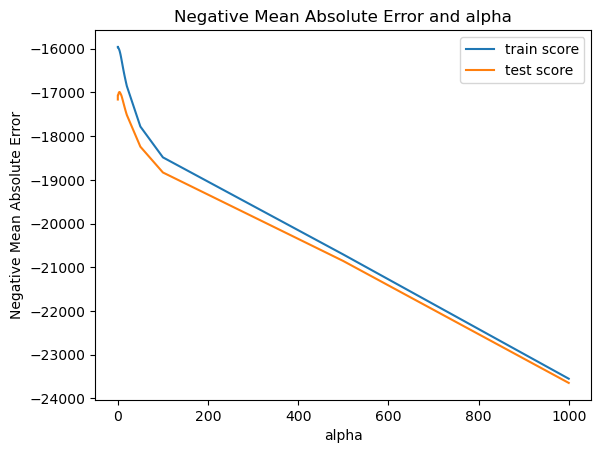

In [210]:
# Mean Test vs training score
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
# Best estimator for alpha
ridge_model_cv.best_estimator_

#### Model Prediction

In [ ]:
# Checking the coefficient considering alpha=8
ridge = Ridge(alpha=8)
ridge.fit(X_train, y_train)
print("Intercept: ", ridge.intercept_)
print("Coefficients:\n",ridge.coef_)

### Building model, for the detailed statistics